# 데이터 전처리

In [1]:
import numpy as np
import pandas as pd
import os
import warnings 

warnings.filterwarnings(action='ignore')

# 시각화 오류 방지 (라이브러리 충돌)
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

foreign_travel_df = pd.read_csv('./data/외래관광객조사_2023_데이터.txt', delimiter = '\t', encoding='cp949', low_memory=False)

display(foreign_travel_df.head(10))
print(foreign_travel_df.shape) # row: 16196, col: 365

pnid  MVIT  RVIT  XRVIT  TYP  Q1  Q1_1a1  Q1_1a2  Q1_1a3  Q2a1  ...  Q14  \
0   6.0   4.0   4.0    5.0    1   1     2.0     3.0     4.0   4.0  ...    5   
1   7.0  20.0   4.0    5.0    1   2     2.0     9.0     7.0   NaN  ...    5   
2   8.0   2.0   2.0    5.0    1   5     NaN     NaN     NaN   NaN  ...    5   
3  10.0   1.0   1.0    NaN    1   3     NaN     NaN     NaN   NaN  ...    4   
4  11.0   3.0   3.0    5.0    1   2     8.0     3.0     7.0   NaN  ...    5   
5  12.0   1.0   1.0    NaN    1   1     8.0     7.0     NaN   NaN  ...    5   
6  14.0   1.0   1.0    NaN    1   1     4.0     5.0     8.0   1.0  ...    5   
7  16.0   3.0   3.0    5.0    1   3     NaN     NaN     NaN   NaN  ...    4   
8  19.0   1.0   1.0    NaN    1   1     1.0     8.0     NaN   NaN  ...    5   
9  20.0   1.0   1.0    NaN    1   1     7.0     1.0     9.0   1.0  ...    4   

   D_MON  D_BUN  D_NAT  D_SEX  D_AGE  D_MOK  D_NUM  D_GUB      weight  
0    1.0    1.0    3.0    2.0    2.0    1.0    4.0    1.0  866.099893  
1    1.0    1.0    1.0    1.0    3.0    2.0    4.0    1.0  191.333757  
2    1.0    1.0    4.0    2.0    1.0    5.0    2.0    1.0  244.838755  
3    1.0    1.0    5.0    1.0    5.0    3.0    1.0    1.0  555.272342  
4    1.0    1.0    1.0    2.0    4.0    2.0    3.0    1.0  193.434506  
5    1.0    1.0    5.0    2.0    4.0    1.0    1.0    1.0  298.390736  
6    1.0    1.0    8.0    2.0    3.0    1.0    1.0    1.0  130.457228  
7    1.0    1.0    5.0    1.0    2.0    3.0    3.0    1.0  282.046513  
8    1.0    1.0    8.0    1.0    5.0    1.0    1.0    1.0  119.056178  
9    1.0    1.0    3.0    1.0    2.0    1.0    1.0    1.0  636.214288  

[10 rows x 365 columns]

(16196, 365)


In [2]:
# 항목 별 값 조회
columns_value_df= pd.read_excel('./data/외래관광객조사_2023_항목정의서.xlsx', sheet_name=1)
# display(columns_value_df.head(5))

indices = columns_value_df[columns_value_df['항목ID'].notnull()].index.tolist()

# 구간 별 동일값 설정
for i in range(len(indices)):
    # index 설정
    start_idx = indices[i]
    end_idx = indices[i + 1] if i + 1 < len(indices) else len(columns_value_df)
    
    # 각 구간에 동일한 값 설정
    columns_value_df.loc[start_idx:end_idx-1, '항목ID'] = columns_value_df.loc[start_idx, '항목ID']
    columns_value_df.loc[start_idx:end_idx-1, '항목명'] = columns_value_df.loc[start_idx, '항목명']
    columns_value_df.loc[start_idx:end_idx-1, '변수명'] = columns_value_df.loc[start_idx, '변수명']

display(columns_value_df)

항목ID            항목명    변수명  코드값      코드명    비고
0       3.0  한국 방문횟수(카테고리)   RVIT    1       1회   NaN
1       3.0  한국 방문횟수(카테고리)   RVIT    2       2회   NaN
2       3.0  한국 방문횟수(카테고리)   RVIT    3       3회   NaN
3       3.0  한국 방문횟수(카테고리)   RVIT    4    4회 이상   NaN
4       3.0  한국 방문횟수(카테고리)   RVIT    5      재방문   NaN
...     ...            ...    ...  ...      ...   ...
6384  363.0          방한횟수별  D_NUM    3       3회   NaN
6385  363.0          방한횟수별  D_NUM    4    4회 이상   NaN
6386  364.0          여행형태별  D_GUB    1     개별여행  분석변수
6387  364.0          여행형태별  D_GUB    2  AIR-TEL   NaN
6388  364.0          여행형태별  D_GUB    3     단체여행   NaN

[6389 rows x 6 columns]

In [3]:
# 결측치 체크 (숫자형 데이터)

# 항목 정보 가져오기
# columns_info_df= pd.read_excel('./data/외래관광객조사_2023_항목정의서.xlsx')
# number_type_cols = columns_info_df.loc[columns_info_df['데이터타입'] == '코드형', ['항목명', '변수명']]
# display(number_type_cols.head(3))

# missing_counts = japanese_df.isnull().sum(axis=0)
# missing_cols = missing_counts[missing_counts > 0]

# # missing_cols에 실제로 존재하는 컬럼만 필터링
# existing_columns = [col for col in number_type_cols['변수명'].tolist() if col in missing_cols]

# # 숫자형 컬럼의 결측치 값만 가져오기
# missing_num_cols = missing_cols[existing_columns]

# # 결측치 비율 조회
# missing_percentage = (missing_num_cols / len(japanese_df)) * 100
# print(missing_percentage)

# 설문조사 데이터로 결측치를 하나의 값, 범주로 보고 처리 진행하는 것이 나을 것으로 확인됨
# because. 무응답, 해당없음 값에 NaN이 많이 확인되기 때문
# 숫자형 필드들이므로 -1로 설정

foreign_travel_df.fillna(-1, inplace=True)

In [4]:
# 일본 방한 여행객 데이터
japanese_df = foreign_travel_df[foreign_travel_df['D_NAT'] == 2]
japanese_df.info()
print(japanese_df.shape) # row: 1963, col: 365

pd.set_option('display.max_columns', 274)  # 모든 열을 출력하도록 설정
pd.set_option("display.max_rows", 274)

display(japanese_df.head(3))

<class 'pandas.core.frame.DataFrame'>
Index: 1963 entries, 25 to 16169
Columns: 365 entries, pnid to weight
dtypes: float64(347), int64(17), object(1)
memory usage: 5.5+ MB
(1963, 365)


pnid  MVIT  RVIT  XRVIT  TYP  Q1  Q1_1a1  Q1_1a2  Q1_1a3  Q2a1  Q2a2  \
25   40.0   2.0   2.0    5.0    1   1     5.0    -1.0    -1.0   6.0  -1.0   
35   69.0  20.0   4.0    5.0    1   1     4.0    -1.0    -1.0  -1.0  -1.0   
55  126.0   5.0   4.0    5.0    1   1     5.0     9.0     8.0  -1.0  -1.0   

    Q2a3  Q2a_dk  Q2_1a1  Q2_1a2  Q2_1a3  Q3_1a1  Q3_1a2  Q3_1a3  Q3_2a1  \
25  -1.0    -1.0    11.0    -1.0    -1.0    11.0    -1.0    -1.0    12.0   
35  -1.0    15.0    -1.0    -1.0    -1.0     1.0     2.0    -1.0     7.0   
55  -1.0    15.0    -1.0    -1.0    -1.0     1.0     2.0    -1.0     4.0   

    Q3_2a2  Q3_2a3  Q4a1  Q4a2  Q4a3  Q4a_dk  Q4_1a1  Q4_1a2  Q4_1a3  Q4_2a1  \
25    -1.0    -1.0   1.0  -1.0  -1.0    -1.0     1.0    -1.0    -1.0    -1.0   
35     6.0     3.0   1.0  -1.0  -1.0    -1.0     1.0    -1.0    -1.0    -1.0   
55     3.0    -1.0   1.0  -1.0  -1.0    -1.0     1.0    -1.0    -1.0    -1.0   

    Q4_2a2  Q4_2a3  Q4_2a_dk  Q5  Q5_1a01  Q5_1a02  Q5_1a03  Q5_1a04  Q5_1a05  \
25    -1.0    -1.0      11.0   2      1.0     -1.0     -1.0     -1.0     -1.0   
35    -1.0    -1.0      11.0   5      1.0     -1.0     -1.0     -1.0     -1.0   
55    -1.0    -1.0      11.0   4      1.0     -1.0     -1.0     -1.0     -1.0   

    Q5_1a06  Q5_1a07  Q5_1a08  Q5_1a09  Q5_1a10 Q5_1a99  Q7A  Q7a_dk  Q7a2  \
25     -1.0     -1.0     -1.0     -1.0     -1.0      -1  2.0    -1.0  -1.0   
35     -1.0     -1.0     -1.0     -1.0     -1.0      -1  1.0     1.0  -1.0   
55     -1.0     -1.0     -1.0     -1.0     -1.0      -1  2.0    -1.0  -1.0   

    Q7a3  Q7a4  Q7a5  Q7a6  Q7a7  Q7a8  MQ7_1  MQ7_1제외  MQ7_2  MQ7_1$15제외  \
25  -1.0  -1.0  -1.0   6.0  -1.0  -1.0    3.0      2.0    0.0         3.0   
35  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0    1.0     -1.0   -1.0        -1.0   
55  -1.0  -1.0  -1.0   6.0  -1.0  -1.0    2.0      1.0    0.0         2.0   

    MQ7_1제외$15제외  RQ7_1  RQ7_1제외  RQ7_2  RQ7_1$15제외  RQ7_1제외$15제외  Q8a01  \
25           2.0    3.0      2.0    0.0         3.0           2.0   -1.0   
35          -1.0    1.0     -1.0   -1.0        -1.0          -1.0    1.0   
55           1.0    2.0      1.0    0.0         2.0           1.0    1.0   

    Q8a02  Q8a03  Q8a04  Q8a05  Q8a06  Q8a07  Q8a08  Q8a09  Q8a10  Q8a11  \
25   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   11.0   
35    2.0   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   
55    2.0   -1.0    4.0   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   

    Q8a12  Q8a13  Q8a14  Q8a15  Q8a16  Q8a17  Q8a18  Q8a19  Q8_1a1  Q8_1a2  \
25   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0      11    -1.0   
35   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0       1     2.0   
55   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0       2     1.0   

    Q8_1a3   Q9_1_1  Q9_1_2  Q9_1_3  Q9_1_4  Q9_1_5  Q9_2a01  Q9_2a02  \
25    -1.0  11102.0    -1.0    -1.0    -1.0    -1.0      1.0     -1.0   
35    -1.0  11504.0    -1.0    -1.0    -1.0    -1.0      1.0     -1.0   
55     4.0  11515.0    -1.0    -1.0    -1.0    -1.0      1.0     -1.0   

    Q9_2a03  Q9_2a04  Q9_2a05  Q9_2a06  Q9_2a07  Q9_2a08  Q9_2a09  Q9_2a10  \
25     -1.0     -1.0     -1.0     -1.0     -1.0     -1.0     -1.0     -1.0   
35     -1.0     -1.0     -1.0     -1.0     -1.0     -1.0     -1.0     -1.0   
55     -1.0     -1.0     -1.0     -1.0     -1.0     -1.0     -1.0     -1.0   

    Q9_2a11  Q9_2a12  Q9_2a13  Q9_2a14  Q9_2a15  Q9_2a16  Q9_2a17  KWON1  \
25     -1.0     -1.0     -1.0     -1.0     -1.0     -1.0     -1.0    1.0   
35     -1.0     -1.0     -1.0     -1.0     -1.0     -1.0     -1.0    1.0   
55     -1.0     -1.0     -1.0     -1.0     -1.0     -1.0     -1.0    1.0   

    KWON2  KWON3  KWON4  KWON5  KWON6  KWON7  KWON8  KWONA1  KWONA2  KWONA3  \
25   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0     1.0    -1.0    -1.0   
35   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0     1.0    -1.0    -1.0   
55   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0 

In [5]:
# 시각화 처리를 위한 값 대체

mapping_dict = {col: columns_value_df[columns_value_df['변수명'] == col].set_index('코드값')['코드명'].to_dict()
                for col in columns_value_df['변수명'].unique()}

# 매핑 딕셔너리를 사용해 각 열에 대해 매핑 적용
for col, mapping in mapping_dict.items():
    if col in japanese_df.columns:
        japanese_df.loc[:, col] = japanese_df[col].map(mapping).fillna(japanese_df[col])

# 데이터 분석 및 시각화

In [6]:
# 방한하는 나이, 성별, 연령대 분석

info_df = japanese_df[['D_SEX',  # 성별
                      'D_AGE',  # 나이
                      'D_MOK',  # 방한목적별
                      'D_NUM',  # 방한횟수별
                      'Q1_1a1', # 한국여행 관심 계기 1순위
                      'Q2a1',   # 방문을 고려한 아시아 국가 1순위
                      'Q2_1a1', # 해당국가 관심 계기 1순위
                      'Q3_1a1', # 고려한 관광활동 1순위
                      'Q3_2a1', # 고려한 관광인프라 1순위
                      'Q4a1',   # 여행전 한국관련 정보 수집 경로 1순위
                      'Q4_1a1', # 주로 이용한 사이트 1순위
                      'Q4_2a1', # 부족했던 정보 1순위
                      'Q5',     # 왕복 항공권 및 여행상품 예약시기
                      'Q7A',    # 동반자 유무
                      'Q7a_dk', # 동반자 유형
                      'Q7a2',
                      'Q7a3',
                      'Q7a4',
                      'Q7a5',
                      'Q7a6',
                      'Q7a7',
                      'Q7a8',
                      'Q8a01', # 참여한 활동 1, 2, 3 ...
                      'Q8a02',
                      'Q8a03',
                      'Q8a04',
                      'Q8a05',
                      'Q8a06',
                      'Q8a07',
                      'Q8a08',
                      'Q8a09',
                      'Q8a10',
                      'Q8a11',
                      'Q8a12',
                      'Q8a13',
                      'Q8a14',
                      'Q8a15',
                      'Q8a16',
                      'Q8a17',
                      'Q8a18',
                      'Q8a19',
                      'Q8_1a1', # 만족한 활동 1순위
                      'Q8_1a2', # 만족한 활동 2순위
                      'Q8_1a3', # 만족한 활동 3순위
                      'Q9_1_1', # 가장 좋았던 곳 1순위
                      'Q9_1_2', # 가장 좋았던 곳 2순위
                      'Q9_1_3', # 가장 좋았던 곳 3순위
                      'KWON1',  # 방문권역1 (서움)
                      'KWON2',  # 방문권역2 (경기도)
                      'KWON3',  # 방문권역3 (인천)
                      'KWON4',  # 방문권역4 (강원도)
                      'KWON5',  # 방문권역5 (충청도)
                      'KWON6',  # 방문권역6 (경상도)
                      'KWON7',  # 방문권역7 (전라도)
                      'KWON8',  # 방문권역8 (제주)
                      'KWONA1', # 수도권 및 지방 방문율(수도권 한정)
                      'KWONA2', # 수도권 및 지방 방문율(지방 한정)
                      'KWONA3', # 수도권 및 지방 방문율(수도권+지방)
                      'M박HAP', # 총 숙박기간
                      'M일HAP', # 총 체재기간
                      'Q9_5A1', # 문9-5. 주요 이용 숙박시설(1. 호텔)
                      'Q9_5A2', # 주요 이용 숙박시설 모텔/여관
                      'Q9_5A3', # 주요 이용 숙박시설 콘도미니엄/리조트
                      'Q9_5A4', # 주요 이용 숙박시설 게스트하우스/호스텔
                      'Q9_5A5', # 주요 이용 숙박시설 민박/펜션
                      'Q9_5A6', # 주요 이용 숙박시설 학교/회사 기숙사, 연수원 등
                      'Q9_5A7', # 주요 이용 숙박시설 친척 또는 친구 집
                      'Q9_5A8', # 주요 이용 숙박시설 기타
                      'Q9_5A9', # 주요 이용 숙박시설 숙박하지 않음
                      'Q10_2a01',    # 쇼핑 항목 (향수 / 화장품)
                      'Q10_2a02',    # 쇼핑 항목 (식료품)
                      'Q10_2a03',    # 쇼핑 항목 (의류)
                      'Q10_2a04',    # 쇼핑 항목 신발류
                      'Q10_2a05',    # 쇼핑 항목 가방류
                      'Q10_2a06',    # 쇼핑 항목 보석/악세서리
                      'Q10_2a07',    # 쇼핑 항목 인삼, 한약재
                      'Q10_2a08',    # 쇼핑 항목 주류
                      'Q10_2a09',    # 쇼핑 항목 담배
                      'Q10_2a10',    # 쇼핑 항목 전통 민예품, 칠기, 목각제품
                      'Q10_2a11',    # 쇼핑 항목 한류 스타 관련상품
                      'Q10_2a12',    # 쇼핑 항목 전자제품
                      'Q10_2a13',    # 쇼핑 항목 기타
                      'Q10_3a1',     # 쇼핑 장소 1순위
                      'Q10_3a2',     # 쇼핑 장소 2순위
                      'Q10_3a3',     # 쇼핑 장소 3순위
                      'Q11',         # 전반적 만족도
                      'Q12a01',      # 항목별 만족도 (식도락(음식))
                      'Q12a02',      # 항목별 만족도 (쇼핑)
                      'Q12a03',      # 항목별 만족도 (자연경관 감상)
                      'Q12a04',      # 항목별 만족도 (고궁/역사 유적지 방문)
                      'Q12a05',      # 항목별 만족도 (전통문화체험)
                      'Q12a06',      # 항목별 만족도 (박물관, 전시관 관람)
                      'Q12a07',      # 항목별 만족도 (K-POP/한류스타 관련 공연장 및 드라마/영화 촬영지 방문)
                      'Q12a08',      # 항목별 만족도 (연극, 뮤지컬, 발레 등 공연 관람)
                      'Q12a09',      # 항목별 만족도 (지역 축제 참여)
                      'Q12a10',      # 항목별 만족도 (유흥(나이트라이프 활동 및 카지노등))
                      'Q12a11',      # 항목별 만족도 (오락(놀이공원 및 테마파크 방문 등))
                      'Q12a12',      # 항목별 만족도 (뷰티/미용 관광(마사지샵, 헤어샵, 네일케어등 방문))
                      'Q12a13',      # 항목별 만족도 (치료/건강검진 (피부과, 성형외과, 내/외과 입원, 수술 등))
                      'Q12a14',      # 항목별 만족도 (스포츠/레포츠 관람 (야구, 축구, 농구 등))
                      'Q12a15',      # 항목별 만족도 (스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑, 등반, 자전거, 래프팅 등))
                      'Q13',         # 재방문 의사
                      'Q14'          # 타인 추천 의향
]]

display(info_df.head(3))

D_SEX D_AGE     D_MOK  D_NUM                Q1_1a1 Q2a1 Q2_1a1  \
25    남성   20대  여가/위락/휴식     2회       이동거리/비행시간이 적합해서   태국     기타   
35    남성   50대  여가/위락/휴식  4회 이상  계획한 여행 경비에 적합한 여행지여서 -1.0   -1.0   
55    여성   30대  여가/위락/휴식  4회 이상       이동거리/비행시간이 적합해서 -1.0   -1.0   

                 Q3_1a1                  Q3_2a1       Q4a1            Q4_1a1  \
25  오락(놀이공원 및 테마파크 방문 등                      기타  인터넷 사이트/앱  글로벌 포털사이트 (구글 등)   
35        식도락(음식/미식) 관광  의료체계/질병관리(전염병, 방역관리 등)  인터넷 사이트/앱  글로벌 포털사이트 (구글 등)   
55        식도락(음식/미식) 관광              경제적인 여행 경비  인터넷 사이트/앱  글로벌 포털사이트 (구글 등)   

   Q4_2a1          Q5     Q7A Q7a_dk Q7a2 Q7a3 Q7a4 Q7a5 Q7a6 Q7a7 Q7a8  \
25   -1.0   출발 1~2주 전  동반자 있음   -1.0 -1.0 -1.0 -1.0 -1.0   친구 -1.0 -1.0   
35   -1.0  출발 2~3개월 전  동반자 없음  혼자 방문 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
55   -1.0  출발 1~2개월 전  동반자 있음   -1.0 -1.0 -1.0 -1.0 -1.0   친구 -1.0 -1.0   

            Q8a01 Q8a02 Q8a03         Q8a04 Q8a05 Q8a06 Q8a07 Q8a08 Q8a09  \
25           -1.0  -1.0  -1.0          -1.0  -1.0  -1.0  -1.0  -1.0  -1.0   
35  식도락(음식/미식) 관광    쇼핑  -1.0          -1.0  -1.0  -1.0  -1.0  -1.0  -1.0   
55  식도락(음식/미식) 관광    쇼핑  -1.0  고궁/역사 유적지 방문  -1.0  -1.0  -1.0  -1.0  -1.0   

   Q8a10                 Q8a11 Q8a12 Q8a13 Q8a14 Q8a15 Q8a16 Q8a17 Q8a18  \
25  -1.0  오락(놀이공원 및 테마파크 방문 등)  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0   
35  -1.0                  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0   
55  -1.0                  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0   

   Q8a19                Q8_1a1         Q8_1a2        Q8_1a3  \
25  -1.0  오락(놀이공원 및 테마파크 방문 등)           -1.0          -1.0   
35  -1.0         식도락(음식/미식) 관광             쇼핑          -1.0   
55  -1.0                    쇼핑  식도락(음식/미식) 관광  고궁/역사 유적지 방문   

                Q9_1_1 Q9_1_2 Q9_1_3 KWON1 KWON2 KWON3 KWON4 KWON5 KWON6  \
25  서울특별시-파라다이스워커힐 카지노   -1.0   -1.0    서울  -1.0  -1.0  -1.0  -1.0  -1.0   
35           서울특별시-마포구   -1.0   -1.0    서울  -1.0  -1.0  -1.0  -1.0  -1.0   
55           서울특별시-인사동   -1.0   -1.0    서울  -1.0  -1.0  -1.0  -1.0  -1.0   

   KWON7 KWON8  KWONA1 KWONA2 KWONA3  M박HAP  M일HAP Q9_5A1 Q9_5A2 Q9_5A3  \
25  -1.0  -1.0  수도권 한정   -1.0   -1.0    3.0    4.0     호텔   -1.0   -1.0   
35  -1.0  -1.0  수도권 한정   -1.0   -1.0    3.0    4.0     호텔   -1.0   -1.0   
55  -1.0  -1.0  수도권 한정   -1.0   -1.0    6.0    7.0     호텔   -1.0   -1.0   

   Q9_5A4 Q9_5A5 Q9_5A6 Q9_5A7 Q9_5A8 Q9_5A9 Q10_2a01          Q10_2a02  \
25   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0     -1.0              -1.0   
35   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0     -1.0  식료품(김치, 김, 과자 등)   
55   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0     -1.0  식료품(김치, 김, 과자 등)   

   Q10_2a03 Q10_2a04 Q10_2a05 Q10_2a06 Q10_2a07 Q10_2a08 Q10_2a09 Q10_2a10  \
25     -1.0     -1.0     -1.0     -1.0     -1.0     -1.0     -1.0     -1.0   
35       의류     -1.0     -1.0     -1.0     -1.0     -1.0     -1.0     -1.0   
55     -1.0     -1.0     -1.0     -1.0     -1.0     -1.0     -1.0     -1.0   

   Q10_2a11 Q10_2a12 Q10_2a13 Q10_3a1 Q10_3a2 Q10_3a3    Q11 Q12a01 Q12a02  \
25     -1.0     -1.0     -1.0    -1.0    -1.0    -1.0  매우 만족   -1.0   -1.0   
35     -1.0     -1.0     -1.0     백화점     로드샵    -1.0  매우 만족  매우 만족  매우 만족   
55     -1.0     -1.0     -1.0     로드샵    -1.0    -1.0  매우 만족  매우 만족     만족   

   Q12a03 Q12a04 Q12a05 Q12a06 Q12a07 Q12a08 Q12a09 Q12a10 Q12a11 Q12a12  \
25   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0  매우 만족   -1.0   
35   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   
55   -1.0     만족   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   

   Q12a13 Q12a14 Q12a15      Q13      Q14  
25   -1.0   -1.0   -1.0   매우 그렇다   매우 그렇다  
35   -1.0   -1.0   -1.0   매우 그렇다   매우 그렇다  
55   -1.0   -1.0   -1.0  대체로 그렇다  대체로 그렇다

## 한국어 폰트 세팅

In [7]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

# 한국어 폰트 설정
font_path = "C:\\Users\\eighttwofive\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Pretendard-Regular.otf"  # 폰트 경로

# 폰트 등록
font_manager.fontManager.addfont(font_path)

font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

## EDA

In [8]:
print(info_df.shape)

(1963, 103)


In [9]:
# 기본 EDA 시각화 함수 설정
def eda_plot(col, # 차트 노출할 컬럼
             condition = 'info_df[col] != -1', # 노출 조건
             title = None,
             ylabel = ['명'], # x라벨
             xlabel = None,  # y라벨
             head = None,
             info_df = info_df # 데이터프레임 설정
            ):

    # xlabel이 None이면 기본값 설정
    if xlabel is None:
        xlabel = columns_value_df.loc[columns_value_df['변수명'] == col, '항목명'].head(1).values
    
    # 데이터 필터링
    filtered_data = info_df.loc[eval(condition), col]

    
    # 데이터 값의 빈도 계산 (퍼센트 포함)
    value_counts = filtered_data.value_counts(normalize=True) * 100  # 퍼센트로 변환
    value_counts_abs = filtered_data.value_counts()  # 절대값

    if head is not None:
        value_counts = value_counts.head(head)
        value_counts_abs = value_counts_abs.head(head)

    # Bar plot 생성
    ax = value_counts_abs.plot.bar(
        ylabel=ylabel,
        xlabel=xlabel if xlabel is not None else col,
        figsize=(10, 5),
        color=['#0DD5FF']
    )
    
    # Bar에 퍼센트 표시
    for container in ax.containers:
        ax.bar_label(container, 
                     labels=[f'{v:.1f}%' for v in value_counts.values],  # 퍼센트 형식
                     label_type='edge', 
                     fontsize=10)
    
    # 시각화 표시
    if title is not None:
        plt.title(title)
    
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    
    plt.savefig(f'bar_chart_{col}.png', format='png', dpi=300, bbox_inches='tight')
    
    plt.show()

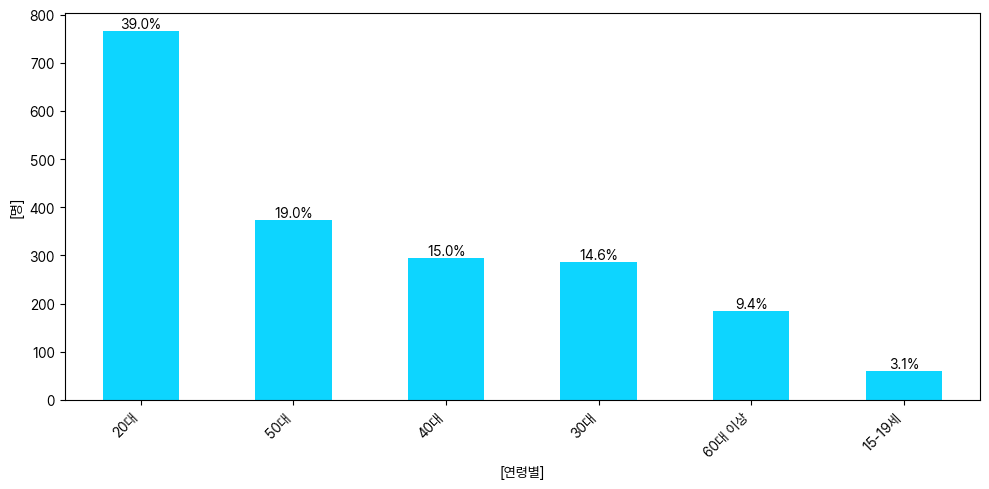

In [10]:
# 나이
eda_plot('D_AGE')

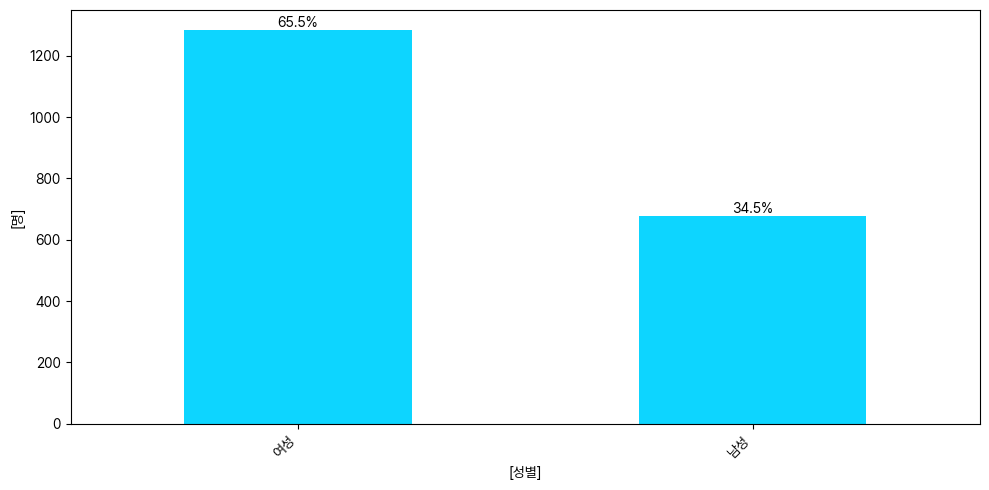

In [11]:
# 성별
eda_plot('D_SEX')

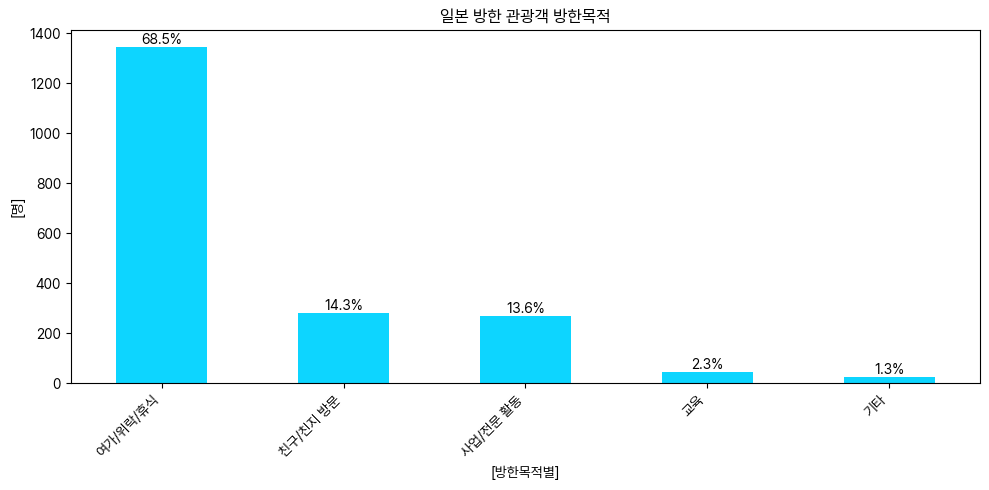

In [12]:
# 방한목적별
eda_plot('D_MOK', title='일본 방한 관광객 방한목적')

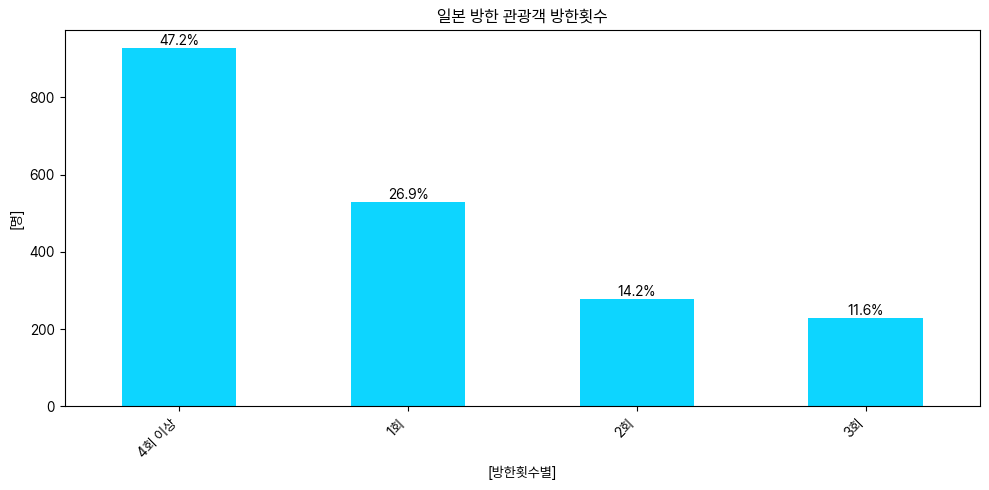

In [13]:
# 방한횟수별
eda_plot('D_NUM', title='일본 방한 관광객 방한횟수')

In [14]:
# 재방문율 계산
# 'D_NUM' 값을 기준으로 재분류
info_df.loc[:, 'D_NUM_reclassified'] = info_df['D_NUM'].apply(
    lambda x: '재방문' if x in ['2회', '3회', '4회 이상'] else '1회'
)

# 재분류된 값 확인
visit_counts = info_df['D_NUM_reclassified'].value_counts()
display(visit_counts)

# 재방문율 계산
revisit_rate = (visit_counts['재방문'] / (visit_counts['재방문'] + visit_counts['1회'])) * 100
print(f'재방문율 : {revisit_rate:.2f}%')

D_NUM_reclassified
재방문    1434
1회      529
Name: count, dtype: int64

재방문율 : 73.05%


- 재방문율 73.05% 짱 높음

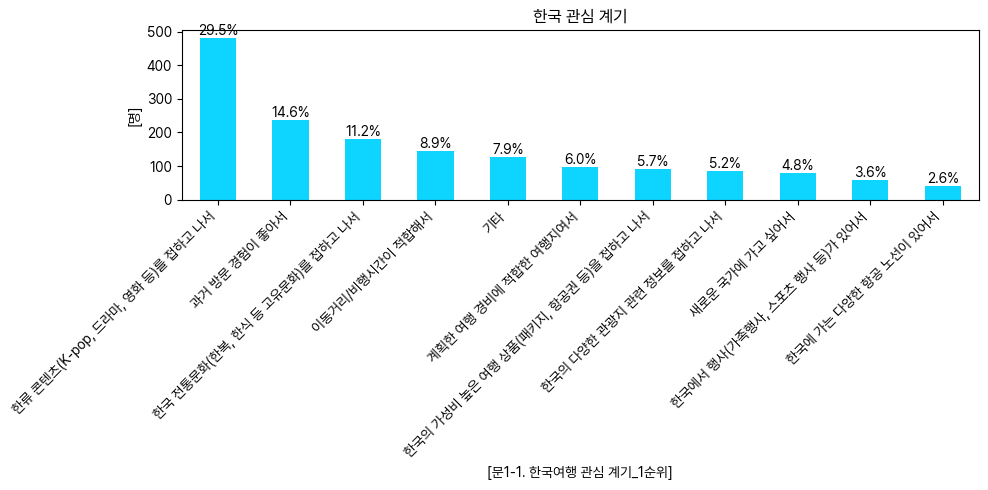

In [15]:
# 관심 계기 1순위 시각화
eda_plot('Q1_1a1', title='한국 관심 계기')

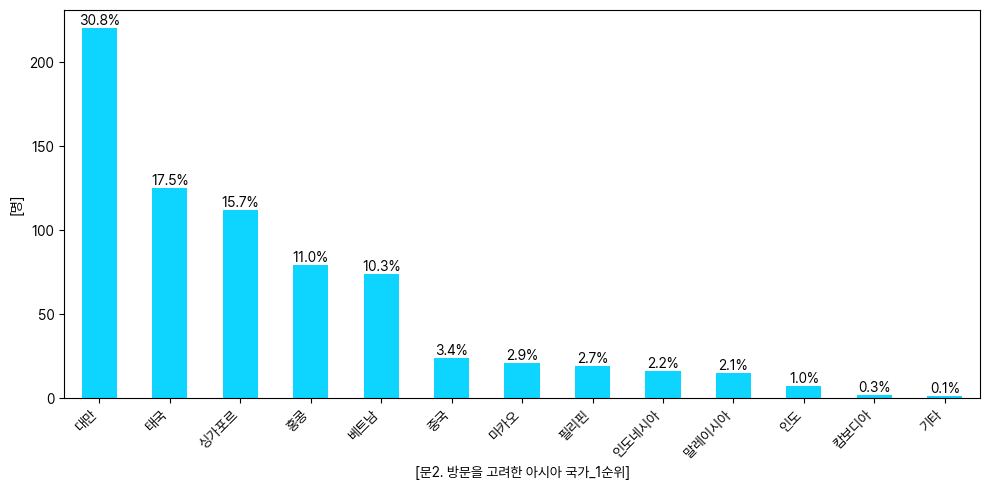

In [16]:
# 방문을 고려한 아시아 국가
eda_plot('Q2a1')

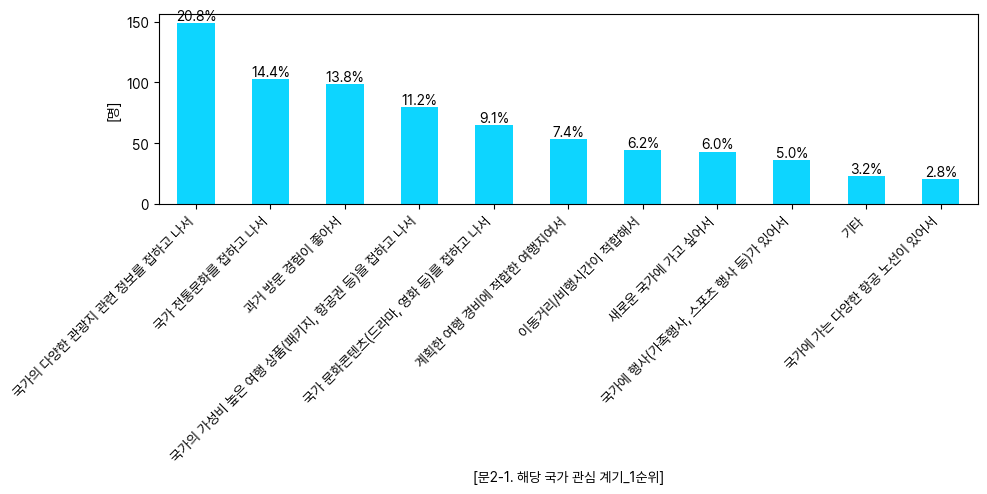

In [17]:
# 해당국가 관심 계기
eda_plot('Q2_1a1')

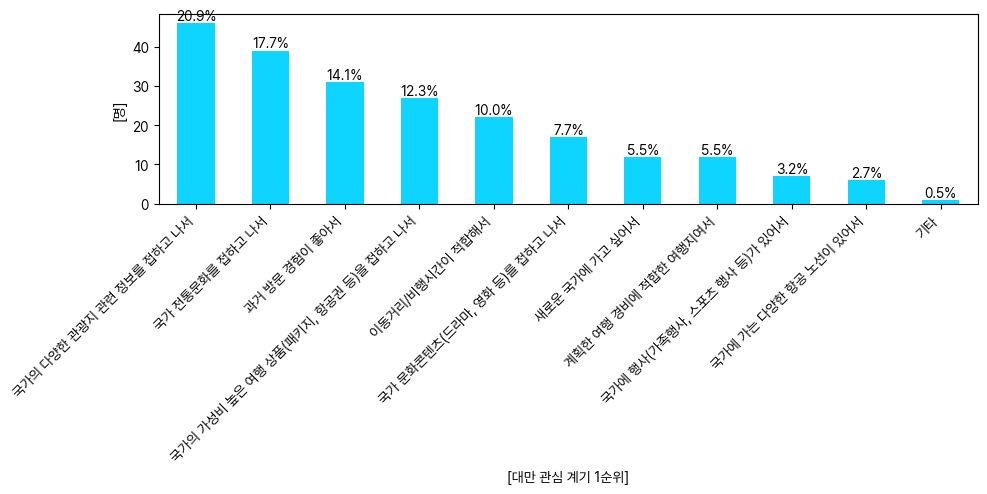

In [18]:
# 대만 관심 계기
eda_plot('Q2_1a1', "(info_df['Q2_1a1'] != -1) & (info_df['Q2a1'] == '대만')", xlabel='[대만 관심 계기 1순위]')

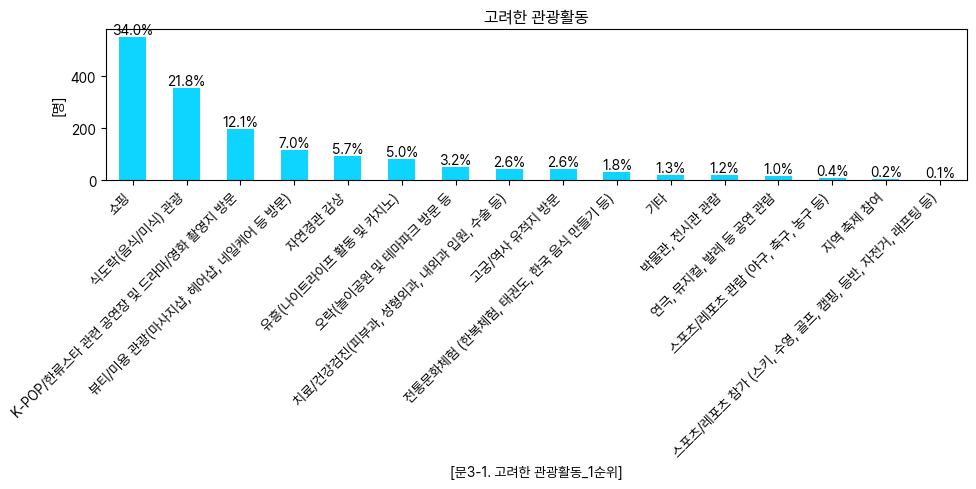

In [19]:
# 고려한 관광활동
eda_plot('Q3_1a1', title='고려한 관광활동')

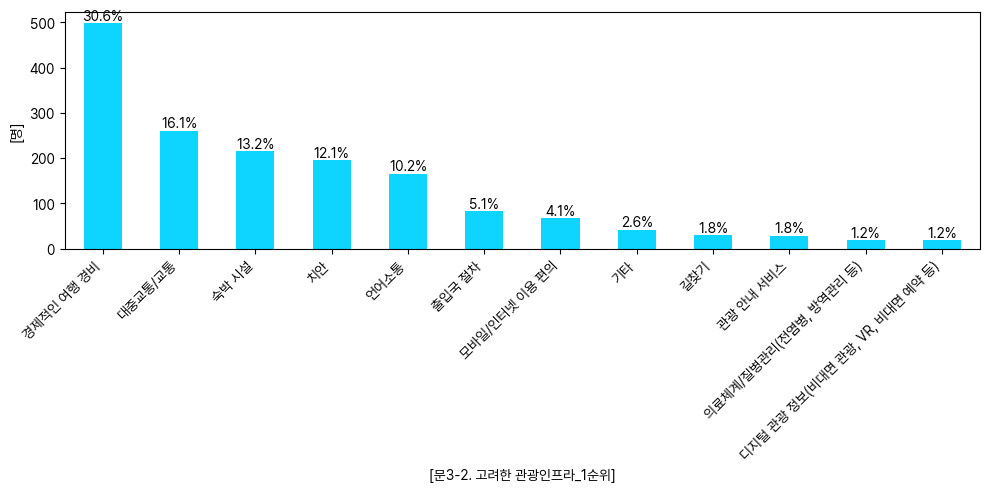

In [20]:
# 고려한 관광인프라 1순위
eda_plot('Q3_2a1')

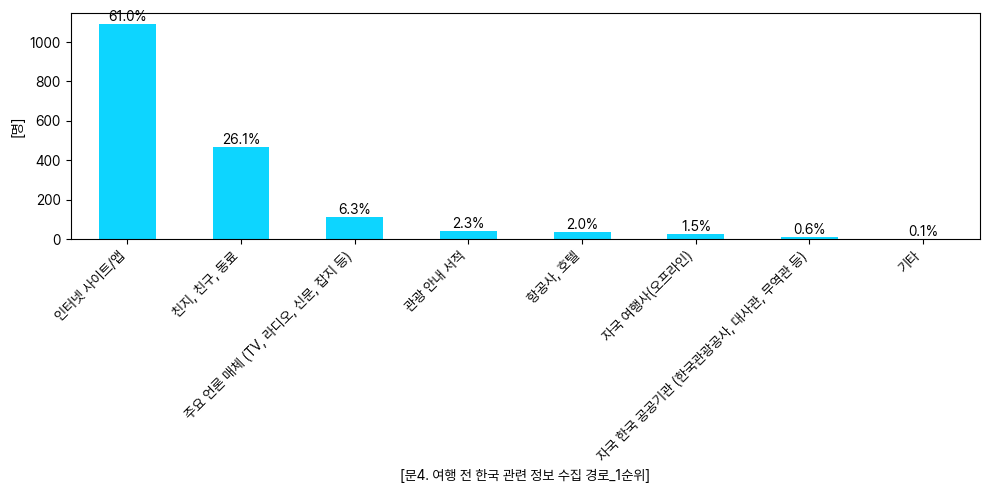

In [21]:
# 여행 전 한국 관련 정보 수집 경로 1순위
eda_plot('Q4a1')

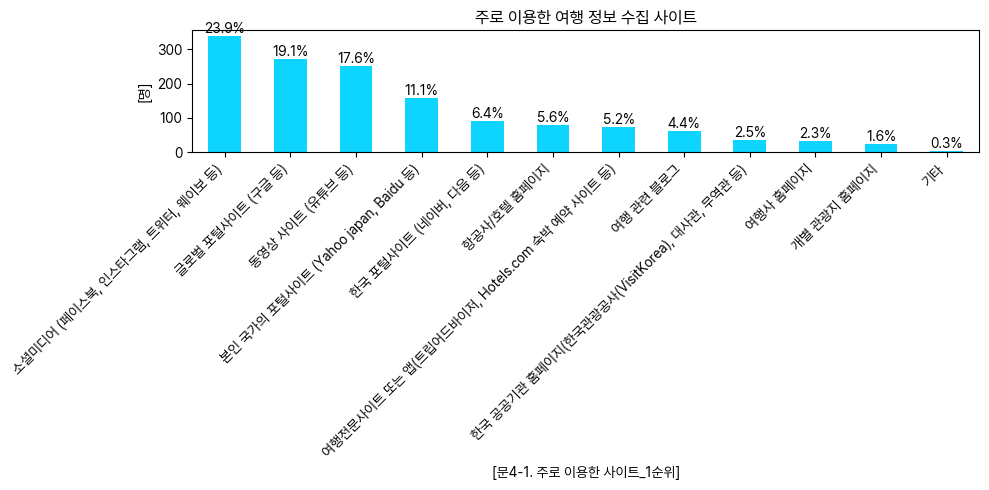

In [22]:
# 주로 이용한 사이트 1순위
eda_plot('Q4_1a1', title='주로 이용한 여행 정보 수집 사이트')

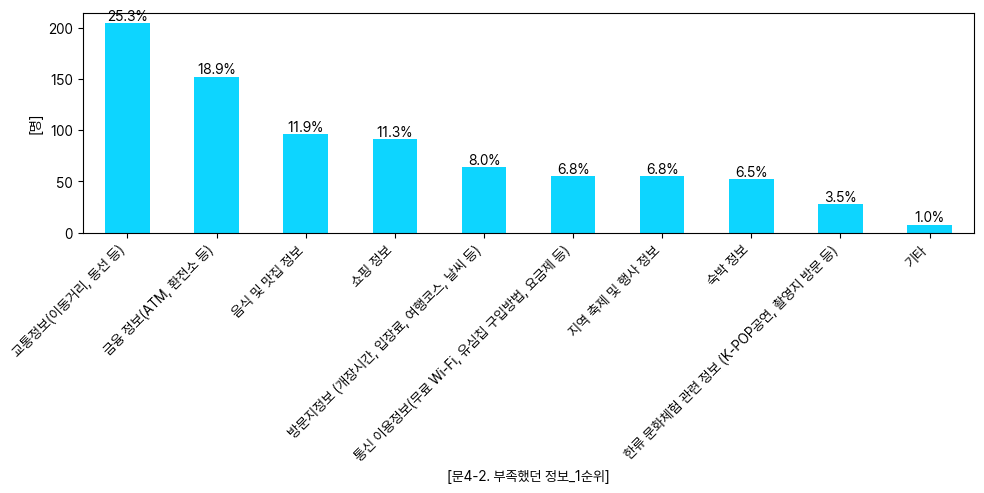

In [23]:
# 부족했던 정보 1순위
eda_plot('Q4_2a1')

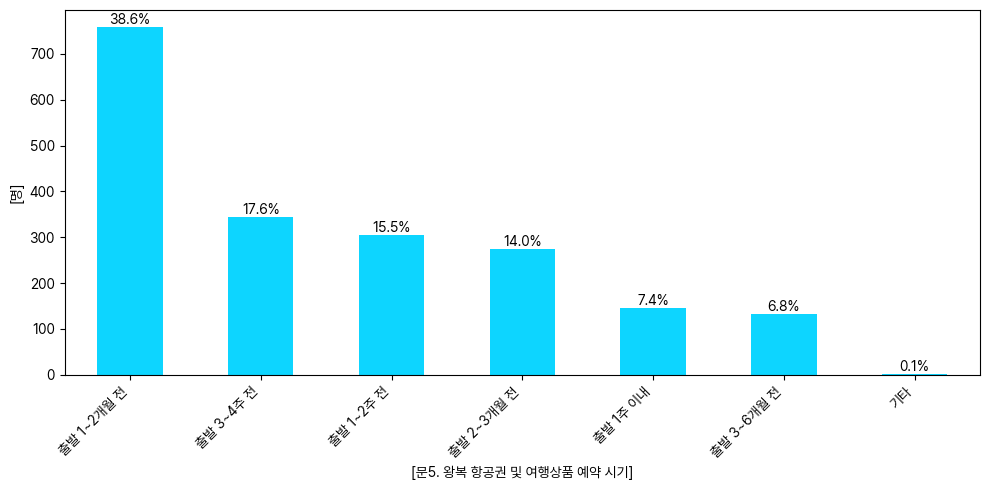

In [24]:
# 왕복 항공권 및 여행상품 예약 시기
eda_plot('Q5')

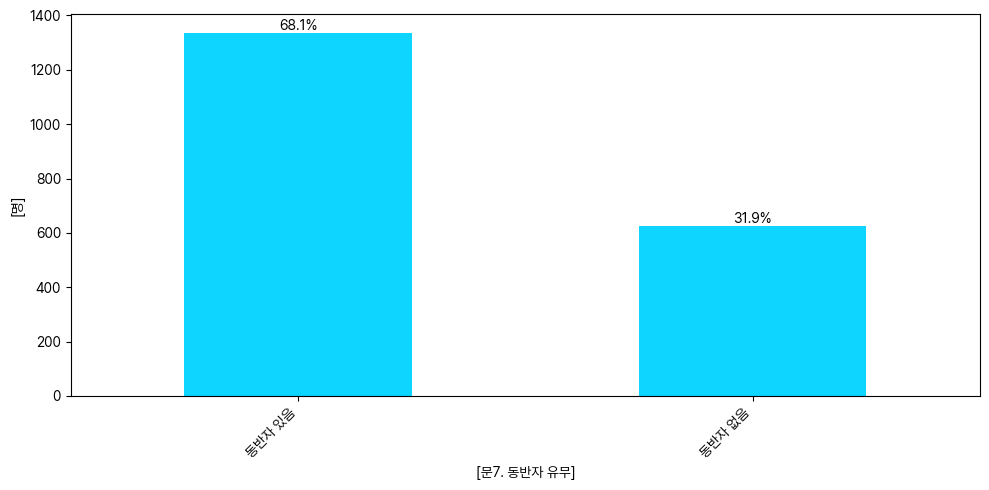

In [25]:
eda_plot('Q7A')

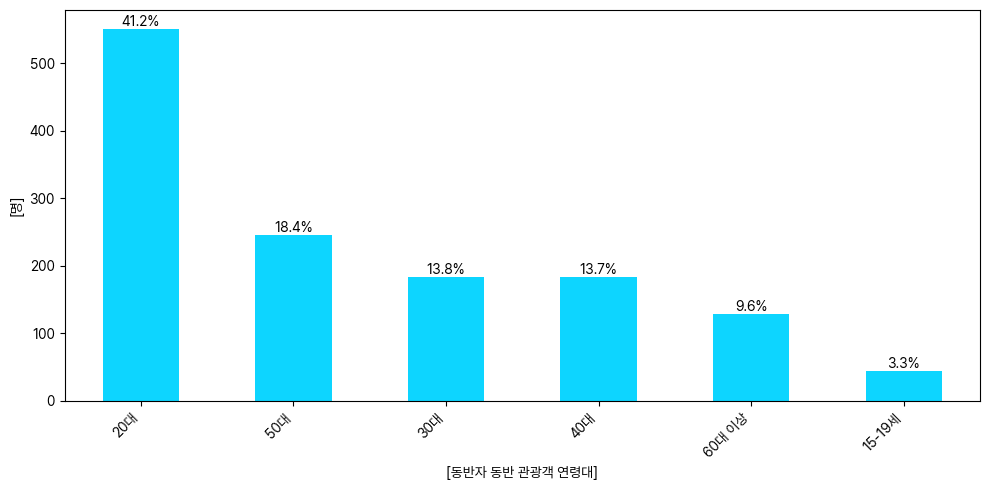

In [26]:
eda_plot('D_AGE', "(info_df['Q7A'] != -1) & (info_df['Q7A'] == '동반자 있음')", xlabel='[동반자 동반 관광객 연령대]')

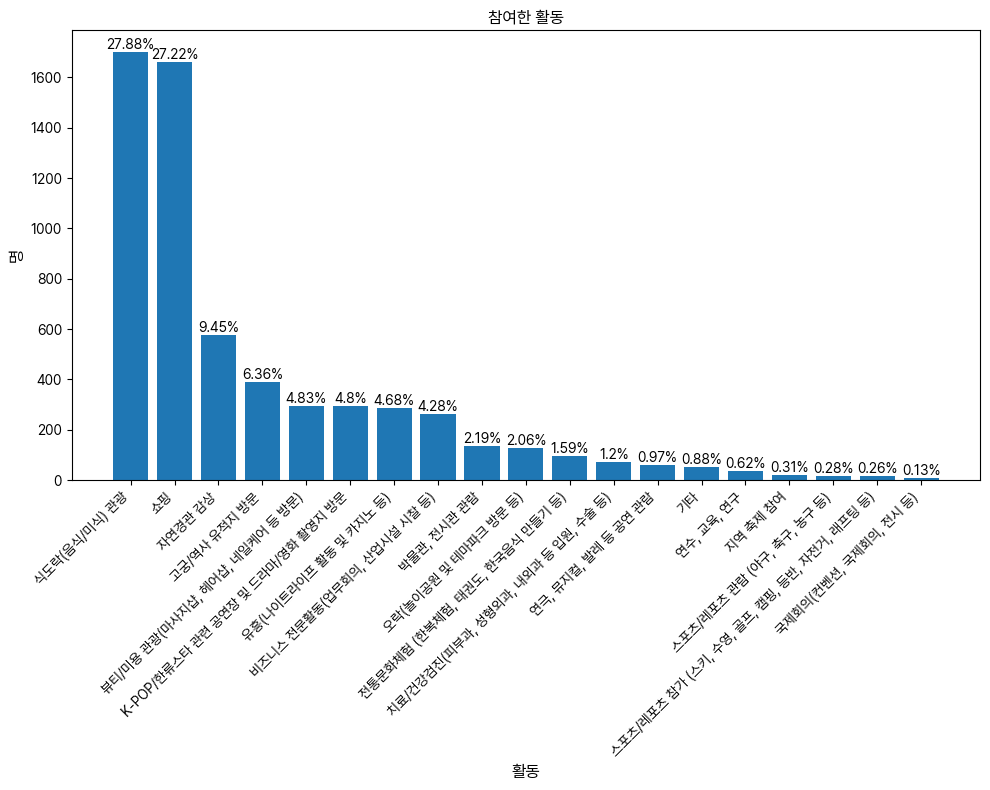

In [27]:
Q8_df = info_df.loc[:, 'Q8a01':'Q8a19']
Q8_df.astype(str)

# 각 컬럼의 데이터 분포를 집계
aggregated_data = {col: info_df.loc[info_df[col] != -1, col].value_counts() for col in Q8_df.columns}

# 각 Series를 합쳐 하나의 Series로 변환
merged_data = pd.concat(aggregated_data).reset_index()
merged_data.columns = ['컬럼명', '범주', '빈도수']

# 퍼센트(비율) 계산
total = merged_data['빈도수'].sum()  # 전체 빈도수 합계
merged_data['퍼센트'] = (merged_data['빈도수'] / total * 100).round(2)  # 소수점 2자리로 반올림

# 내림차순 정렬
merged_data = merged_data.sort_values(by='빈도수', ascending=False)

# 시각화
plt.figure(figsize=(10, 8))
bars = plt.bar(merged_data['범주'], merged_data['빈도수'])

# 퍼센트
for bar, percent in zip(bars, merged_data['퍼센트']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{percent}%', ha='center', va='bottom', fontsize=10)

# 그래프 꾸미기
plt.xticks(rotation=45, ha='right')
plt.title("참여한 활동", fontsize=12)
plt.ylabel("명", fontsize=12)
plt.xlabel("활동", fontsize=12)
plt.tight_layout()
plt.show()

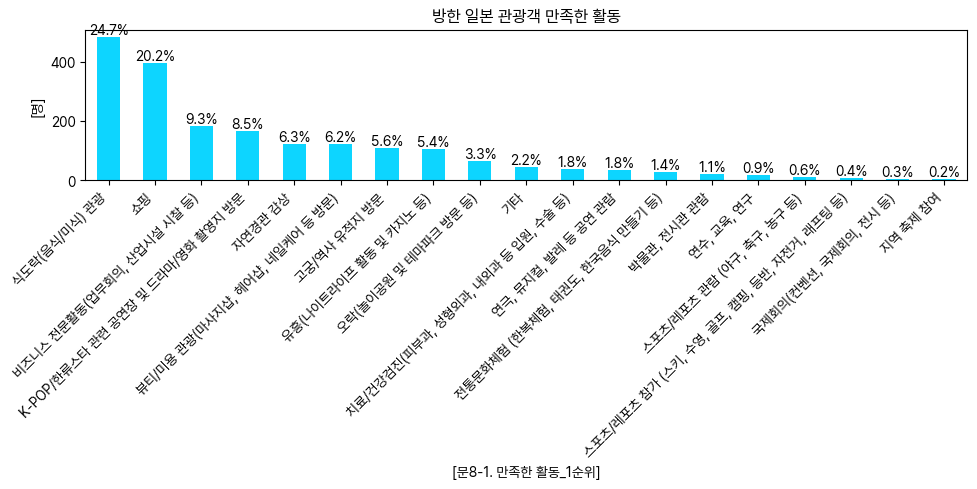

In [28]:
# 만족한 활동 1순위
eda_plot('Q8_1a1', title='방한 일본 관광객 만족한 활동')

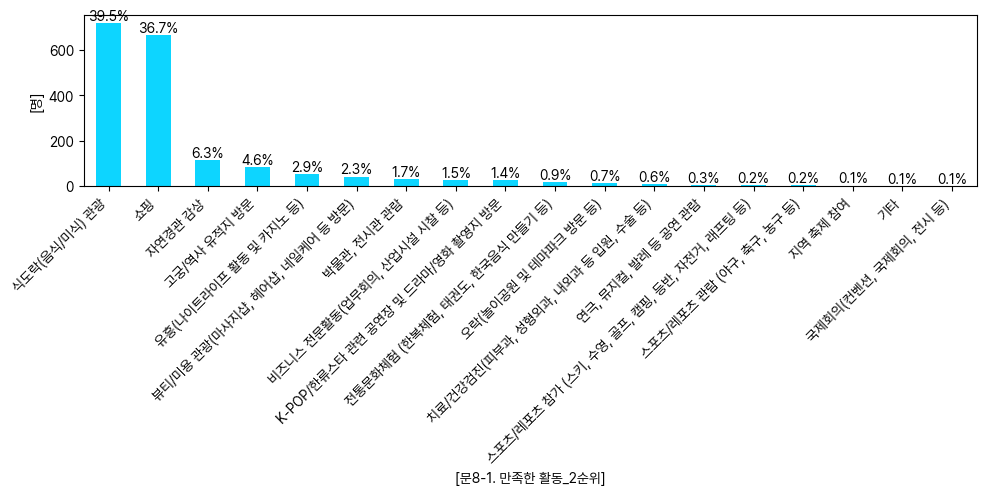

In [29]:
# 만족한 활동 2순위
eda_plot('Q8_1a2')

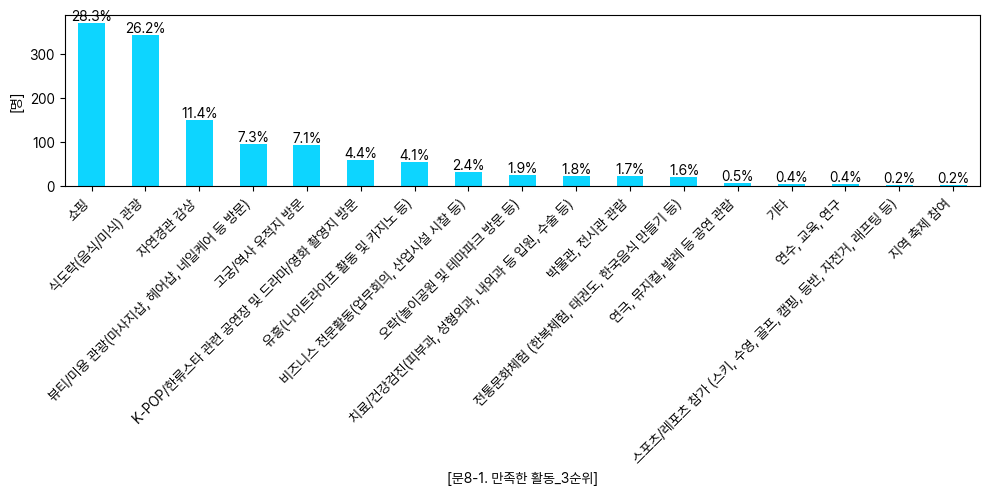

In [30]:
# 만족한 활동 3순위
eda_plot('Q8_1a3')

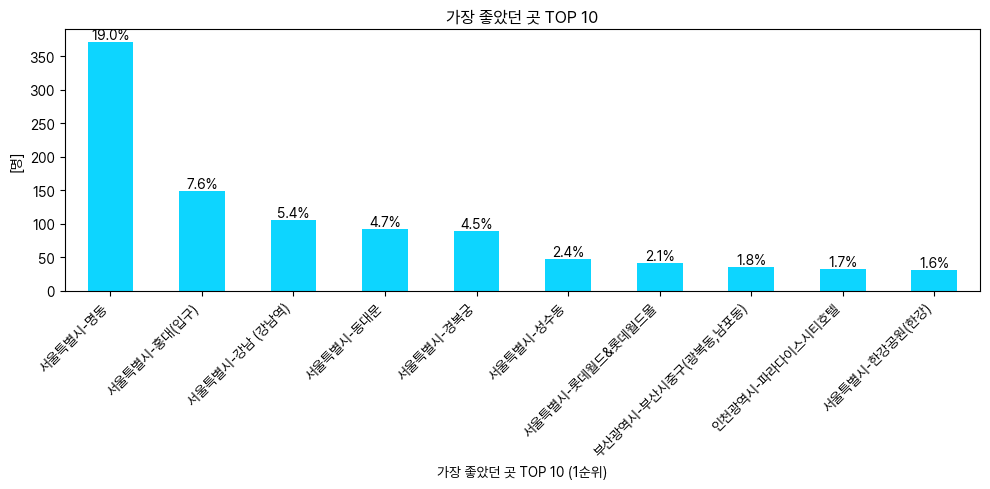

In [31]:
# 가장 좋았던 곳 1순위 TOP 10

# 상위 10개 장소 시각화
eda_plot('Q9_1_1', xlabel='가장 좋았던 곳 TOP 10 (1순위)', head=10, title='가장 좋았던 곳 TOP 10')

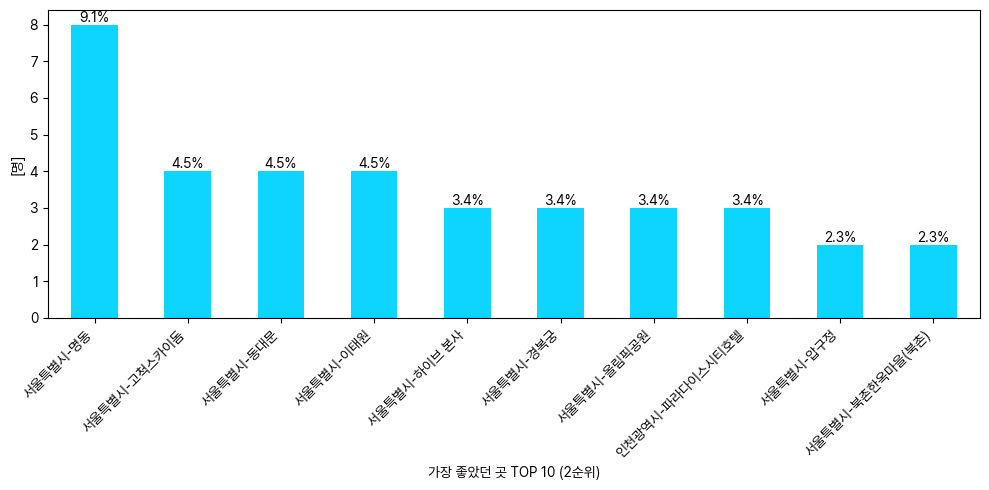

In [32]:
# 가장 좋았던 곳 2순위 TOP 10

# 상위 10개 장소 시각화
eda_plot('Q9_1_2', xlabel='가장 좋았던 곳 TOP 10 (2순위)', head=10)

In [33]:
# 가장 좋았던 곳 3순위 TOP 10 -> 고루 분포되어 있고 대다수가 무응답자, 그닥 의미는 없는 데이터

print(info_df['Q9_1_3'].value_counts())

# 상위 10개 장소 시각화
# eda_plot('Q9_1_3', ylabel='가장 좋았던 곳 TOP 10 (3순위)', head=10)

Q9_1_3
-1.0                                   1955
 경기도-스타필드                                 1
 서울특별시-한강공원(한강)                           1
 서울특별시-성수동                                1
 서울특별시-롯데월드&롯데월드몰                         1
 서울특별시-코엑스(별마당도서관, 아쿠아리움, 코엑스아티움 등)       1
 서울특별시-상암MBC방송국                           1
 서울특별시-광장시장                               1
 서울특별시-남산서울타워                             1
Name: count, dtype: int64


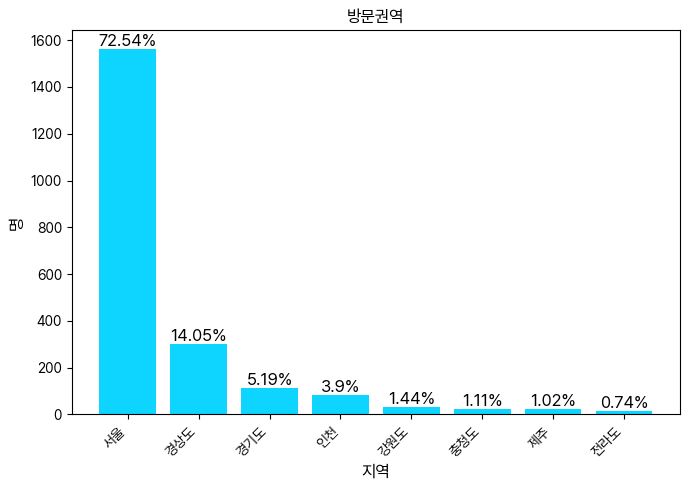

In [34]:
kwon_df = info_df.loc[:, 'KWON1':'KWON8']
kwon_df.astype(str)

# 각 컬럼의 데이터 분포를 집계
aggregated_data = {col: info_df.loc[info_df[col] != -1, col].value_counts() for col in kwon_df.columns}

# 각 Series를 합쳐 하나의 Series로 변환
merged_data = pd.concat(aggregated_data).reset_index()
merged_data.columns = ['컬럼명', '범주', '빈도수']

# 퍼센트(비율) 계산
total = merged_data['빈도수'].sum()  # 전체 빈도수 합계
merged_data['퍼센트'] = (merged_data['빈도수'] / total * 100).round(2)  # 소수점 2자리로 반올림

# 내림차순 정렬
merged_data = merged_data.sort_values(by='빈도수', ascending=False)

# 시각화
plt.figure(figsize=(7, 5))
bars = plt.bar(merged_data['범주'], merged_data['빈도수'], color=['#0DD5FF'])

# 퍼센트
for bar, percent in zip(bars, merged_data['퍼센트']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{percent}%', ha='center', va='bottom', fontsize=12)

# 그래프 꾸미기
plt.xticks(rotation=45, ha='right')
plt.title("방문권역", fontsize=12)
plt.ylabel("명", fontsize=12)
plt.xlabel("지역", fontsize=12)
plt.tight_layout()
plt.savefig('bar_chart_location.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

KWONA1
 수도권 한정    1579
-1.0        384
Name: count, dtype: int64
KWONA2
-1.0      1654
 지방 한정     309
Name: count, dtype: int64
KWONA3
-1.0             1888
 수도권+지방 모두 방문      75
Name: count, dtype: int64


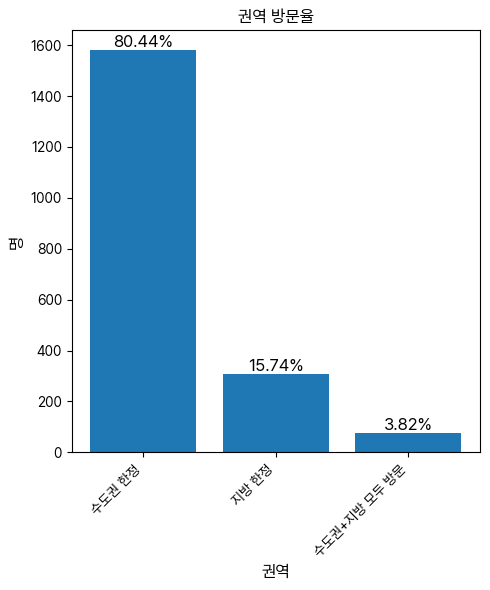

In [35]:
# 'KWONA1', # 수도권 및 지방 방문율(수도권 한정)
# 'KWONA2', # 수도권 및 지방 방문율(지방 한정)
# 'KWONA3', # 수도권 및 지방 방문율(수도권+지방)

print(info_df['KWONA1'].value_counts())
print(info_df['KWONA2'].value_counts())
print(info_df['KWONA3'].value_counts())

kwon_per_df = info_df.loc[:, 'KWONA1':'KWONA3']
kwon_per_df.astype(str)

# 각 컬럼의 데이터 분포를 집계
aggregated_data = {col: info_df.loc[info_df[col] != -1, col].value_counts() for col in kwon_per_df.columns}

# 각 Series를 합쳐 하나의 Series로 변환
merged_data = pd.concat(aggregated_data).reset_index()
merged_data.columns = ['컬럼명', '범주', '빈도수']

# 퍼센트(비율) 계산
total = merged_data['빈도수'].sum()  # 전체 빈도수 합계
merged_data['퍼센트'] = (merged_data['빈도수'] / total * 100).round(2)  # 소수점 2자리로 반올림

# 내림차순 정렬
merged_data = merged_data.sort_values(by='빈도수', ascending=False)

# 시각화
plt.figure(figsize=(5, 6))
bars = plt.bar(merged_data['범주'], merged_data['빈도수'])

# 퍼센트
for bar, percent in zip(bars, merged_data['퍼센트']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{percent}%', ha='center', va='bottom', fontsize=12)

# 그래프 꾸미기
plt.xticks(rotation=45, ha='right')
plt.title("권역 방문율", fontsize=12)
plt.ylabel("명", fontsize=12)
plt.xlabel("권역", fontsize=12)
plt.tight_layout()
plt.show()

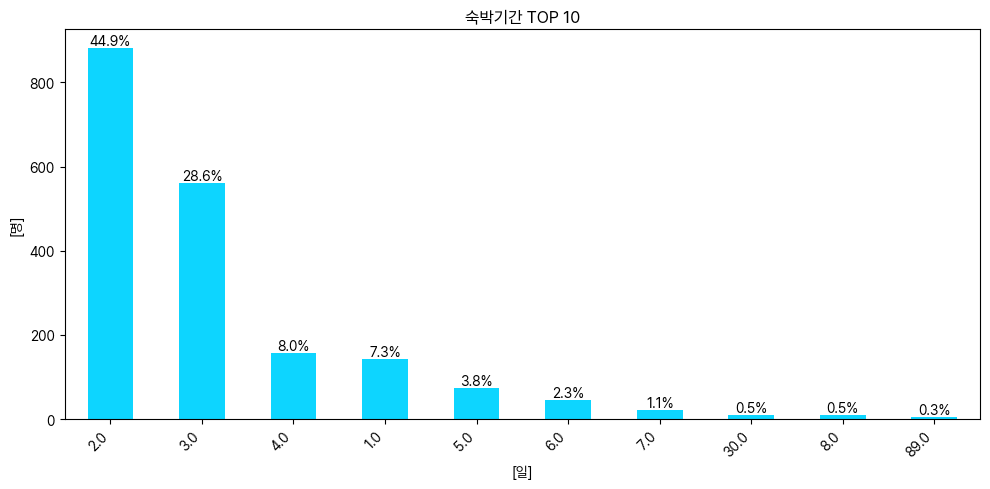

In [36]:
eda_plot('M박HAP', title='숙박기간 TOP 10', xlabel='[일]', head=10)

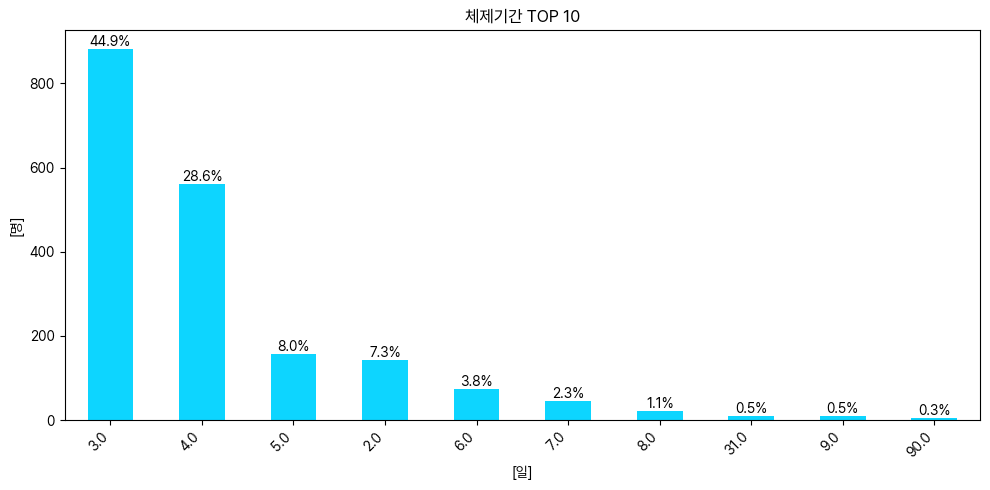

In [37]:
eda_plot('M일HAP', title='체제기간 TOP 10', xlabel='[일]', head=10)

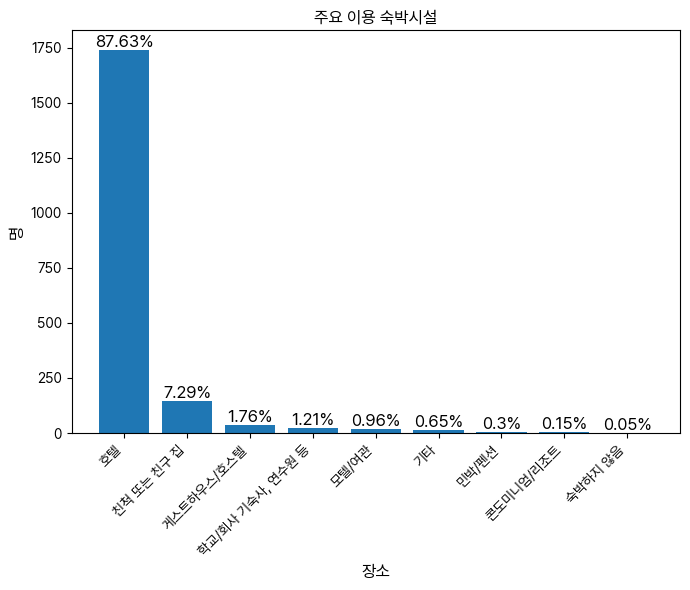

In [38]:
# 주요 이용 숙박시설

Q9_df = info_df.loc[:, 'Q9_5A1':'Q9_5A9']
Q9_df.astype(str)

# 각 컬럼의 데이터 분포를 집계
aggregated_data = {col: info_df.loc[info_df[col] != -1, col].value_counts() for col in Q9_df.columns}

# 각 Series를 합쳐 하나의 Series로 변환
merged_data = pd.concat(aggregated_data).reset_index()
merged_data.columns = ['컬럼명', '범주', '빈도수']

# 퍼센트(비율) 계산
total = merged_data['빈도수'].sum()  # 전체 빈도수 합계
merged_data['퍼센트'] = (merged_data['빈도수'] / total * 100).round(2)  # 소수점 2자리로 반올림

# 내림차순 정렬
merged_data = merged_data.sort_values(by='빈도수', ascending=False)

# 시각화
plt.figure(figsize=(7, 6))
bars = plt.bar(merged_data['범주'], merged_data['빈도수'])

# 퍼센트
for bar, percent in zip(bars, merged_data['퍼센트']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{percent}%', ha='center', va='bottom', fontsize=12)

# 그래프 꾸미기
plt.xticks(rotation=45, ha='right')
plt.title("주요 이용 숙박시설", fontsize=12)
plt.ylabel("명", fontsize=12)
plt.xlabel("장소", fontsize=12)
plt.tight_layout()
plt.show()

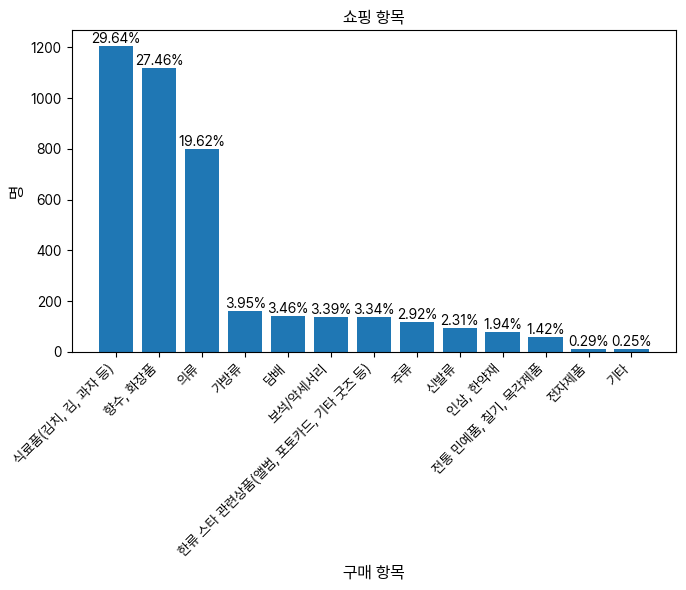

In [39]:
# 쇼핑 항목

Q10_df = info_df.loc[:, 'Q10_2a01':'Q10_2a13']
Q10_df.astype(str)

# 각 컬럼의 데이터 분포를 집계
aggregated_data = {col: info_df.loc[info_df[col] != -1, col].value_counts() for col in Q10_df.columns}

# 각 Series를 합쳐 하나의 Series로 변환
merged_data = pd.concat(aggregated_data).reset_index()
merged_data.columns = ['컬럼명', '범주', '빈도수']

# 퍼센트(비율) 계산
total = merged_data['빈도수'].sum()  # 전체 빈도수 합계
merged_data['퍼센트'] = (merged_data['빈도수'] / total * 100).round(2)  # 소수점 2자리로 반올림

# 내림차순 정렬
merged_data = merged_data.sort_values(by='빈도수', ascending=False)

# 시각화
plt.figure(figsize=(7, 6))
bars = plt.bar(merged_data['범주'], merged_data['빈도수'])

# 퍼센트
for bar, percent in zip(bars, merged_data['퍼센트']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{percent}%', ha='center', va='bottom', fontsize=10)

# 그래프 꾸미기
plt.xticks(rotation=45, ha='right')
plt.title("쇼핑 항목", fontsize=12)
plt.ylabel("명", fontsize=12)
plt.xlabel("구매 항목", fontsize=12)
plt.tight_layout()
plt.show()

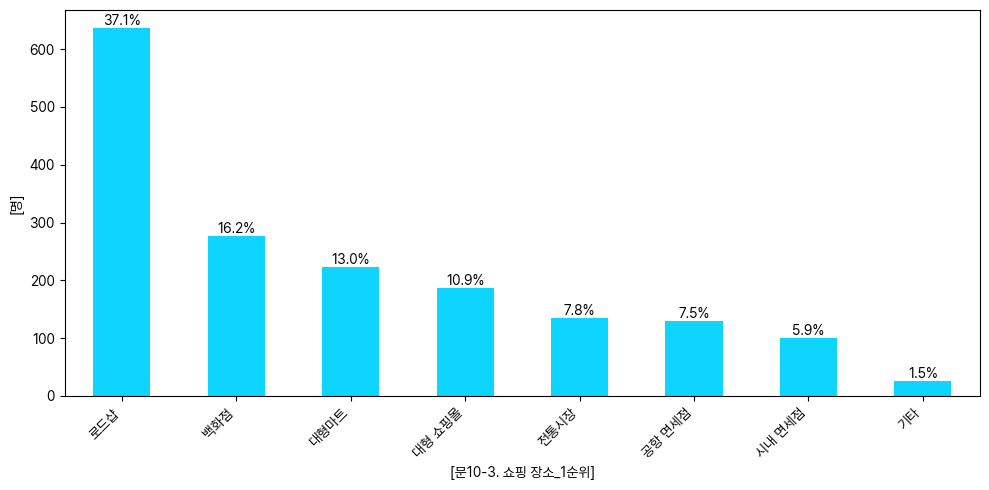

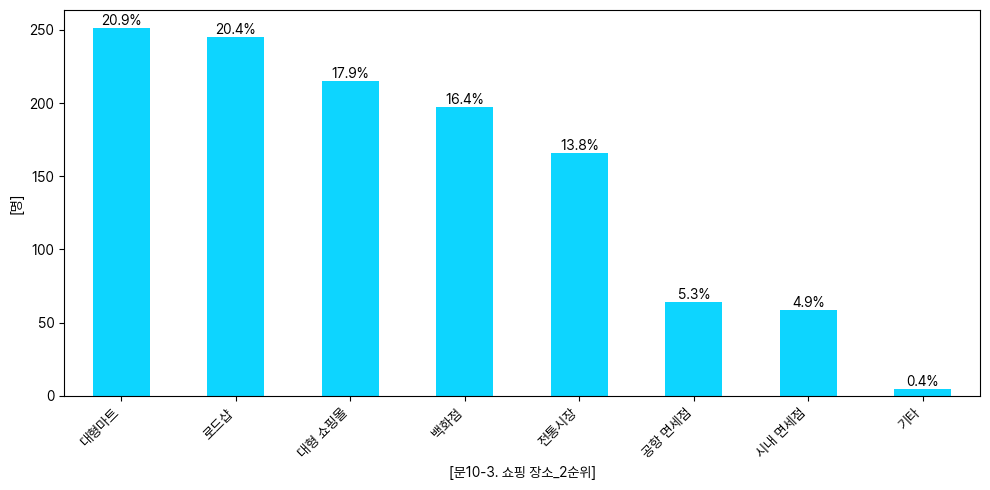

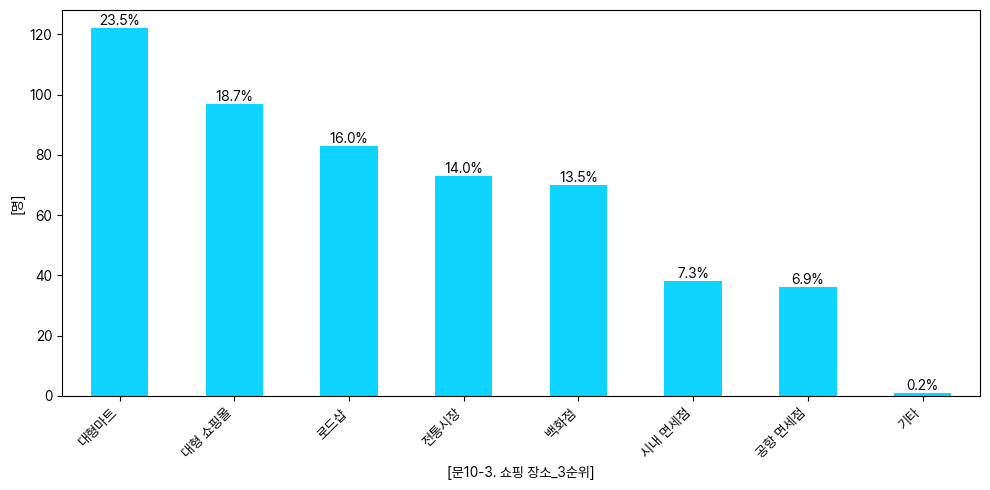

In [40]:
# 쇼핑 장소
for col in info_df.loc[:, 'Q10_3a1':'Q10_3a3'].columns:
    eda_plot(col)

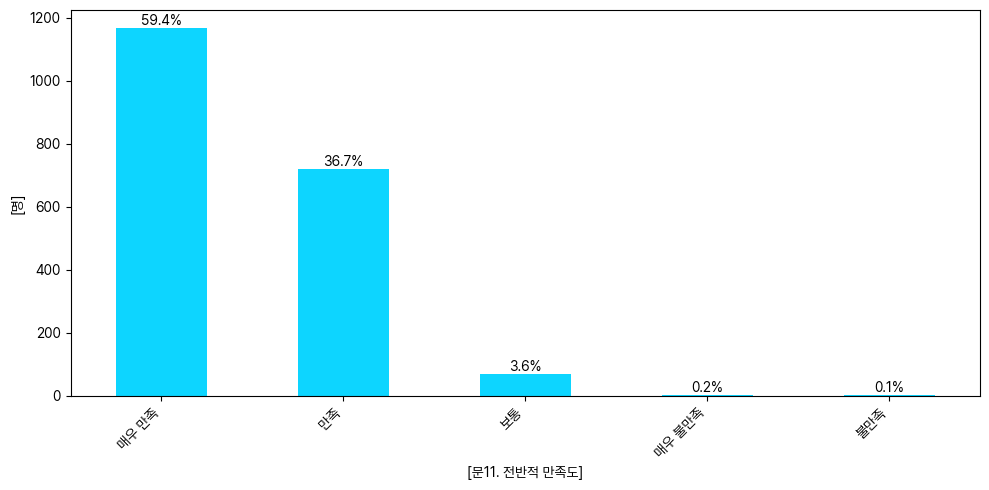

문11. 전반적 만족도 : 4.55


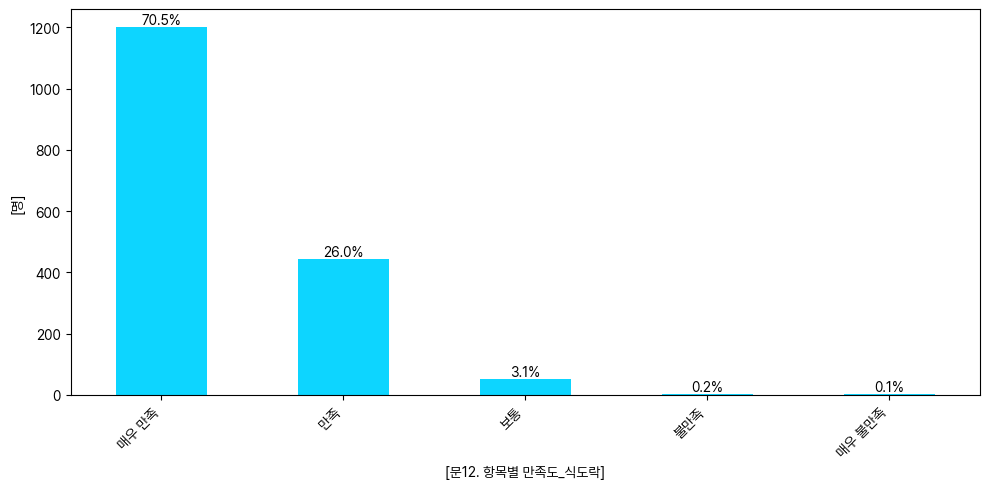

문12. 항목별 만족도_식도락 : 4.67


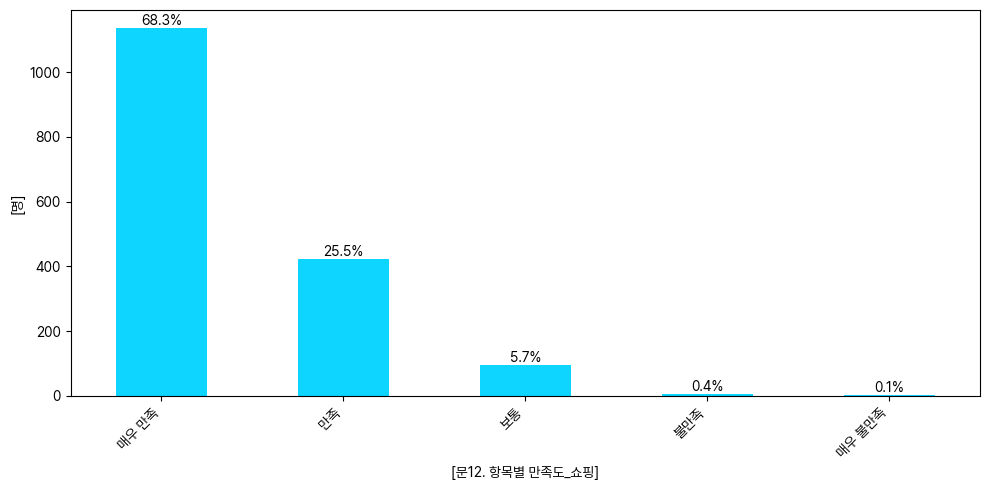

문12. 항목별 만족도_쇼핑 : 4.61


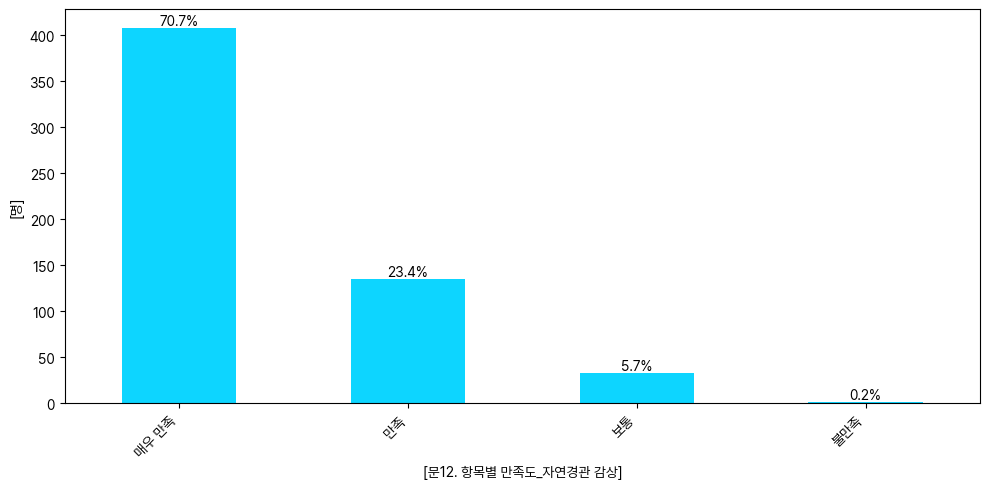

문12. 항목별 만족도_자연경관 감상 : 4.65


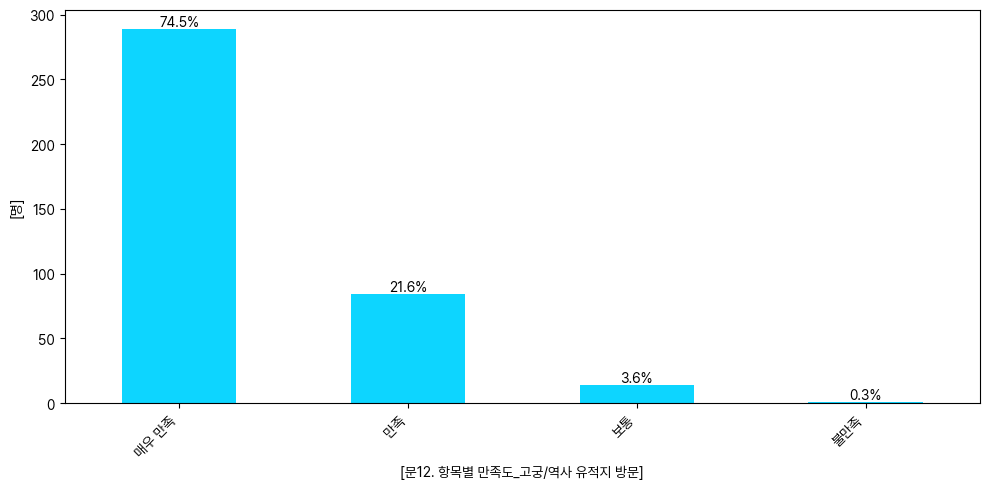

문12. 항목별 만족도_고궁/역사 유적지 방문 : 4.7


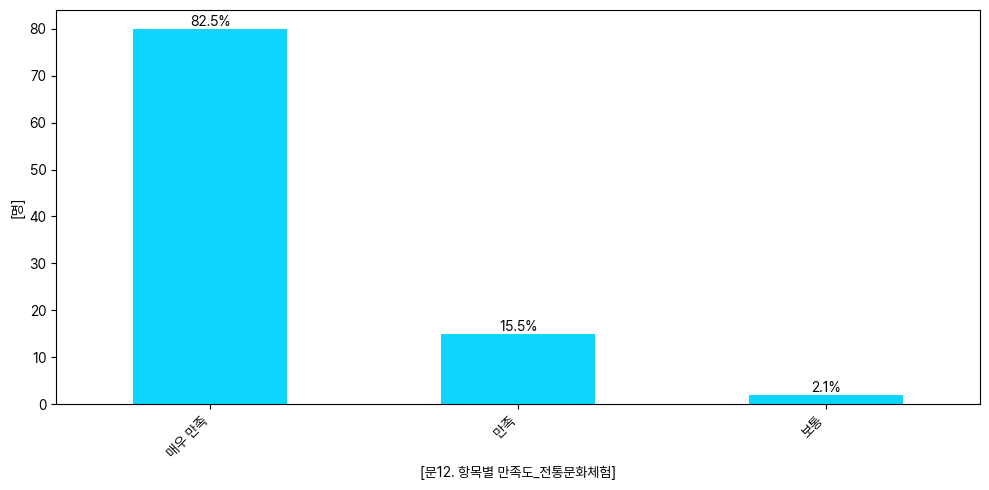

문12. 항목별 만족도_전통문화체험 : 4.8


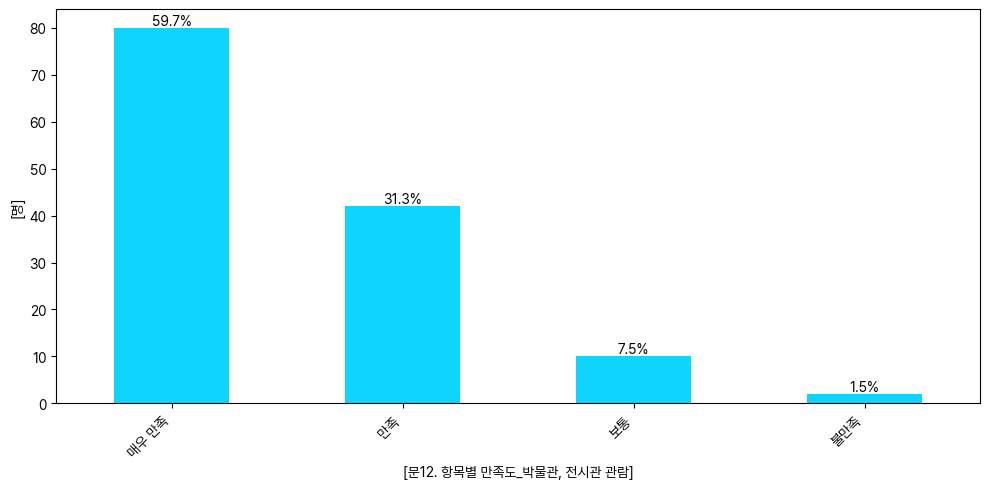

문12. 항목별 만족도_박물관, 전시관 관람 : 4.49


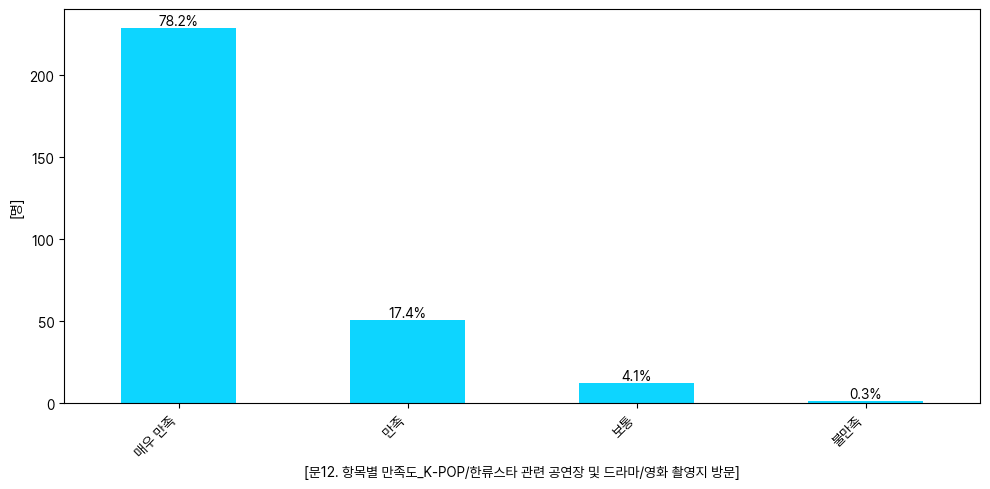

문12. 항목별 만족도_K-POP/한류스타 관련 공연장 및 드라마/영화 촬영지 방문 : 4.73


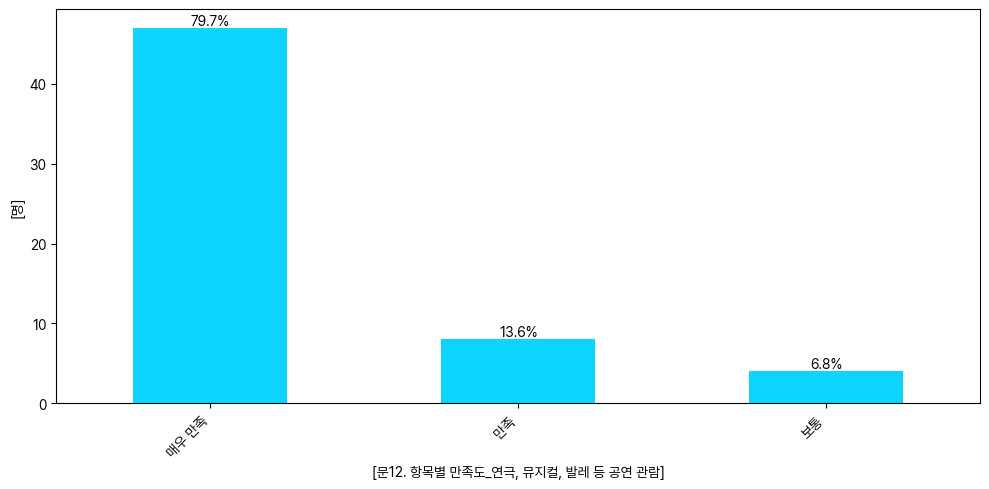

문12. 항목별 만족도_연극, 뮤지컬, 발레 등 공연 관람 : 4.73


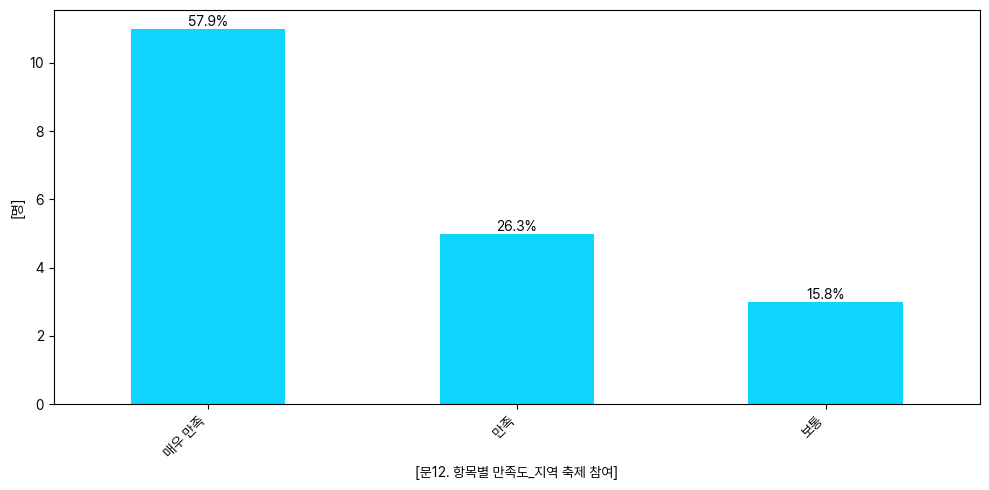

문12. 항목별 만족도_지역 축제 참여 : 4.42


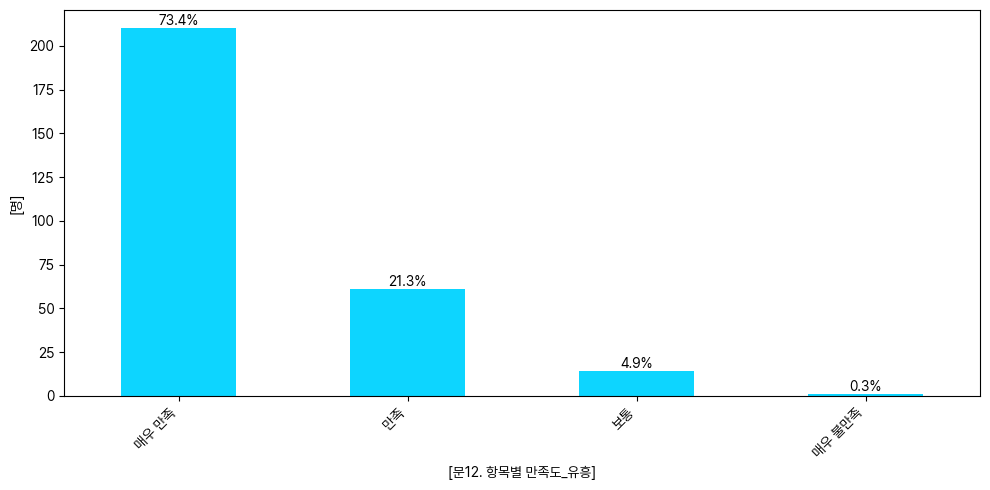

문12. 항목별 만족도_유흥 : 4.67


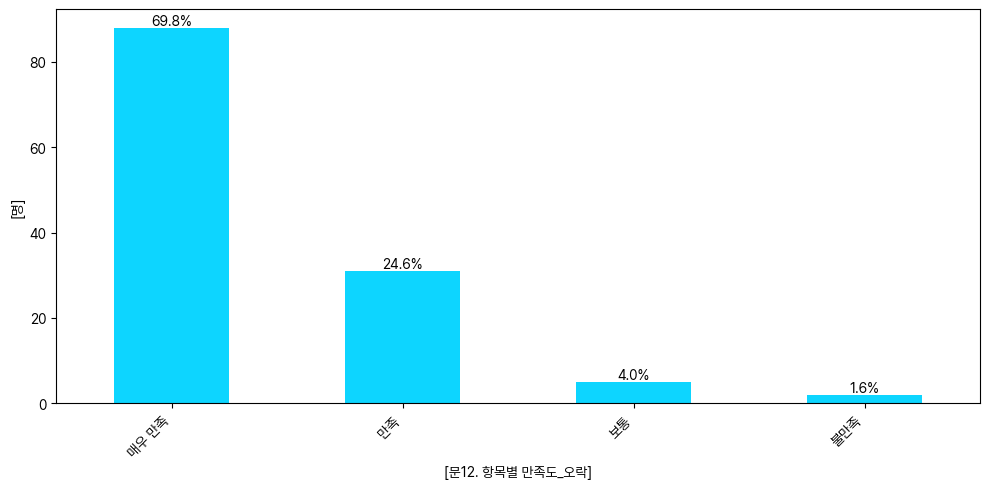

문12. 항목별 만족도_오락 : 4.63


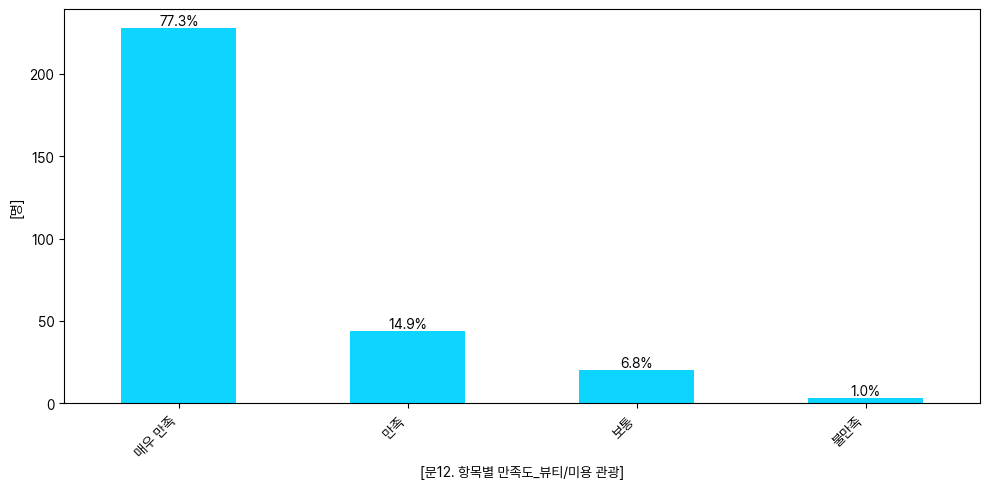

문12. 항목별 만족도_뷰티/미용 관광 : 4.68


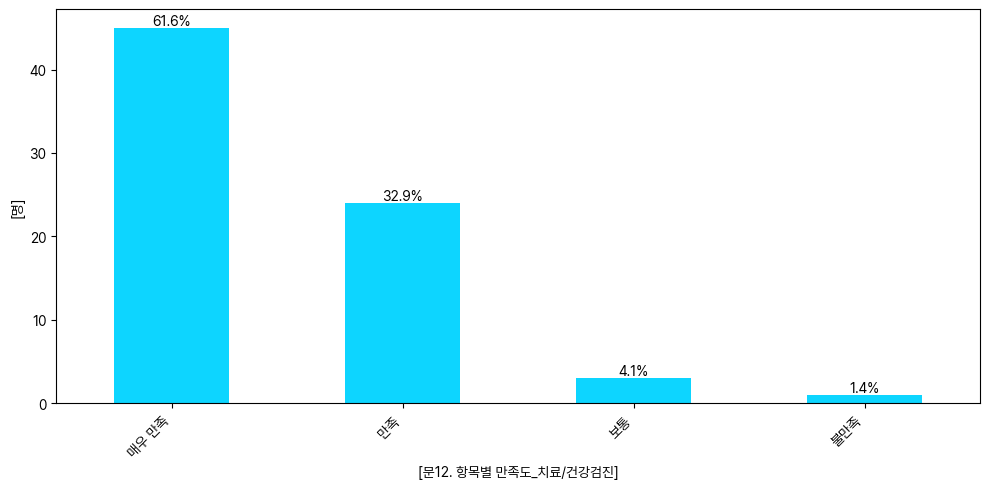

문12. 항목별 만족도_치료/건강검진 : 4.55


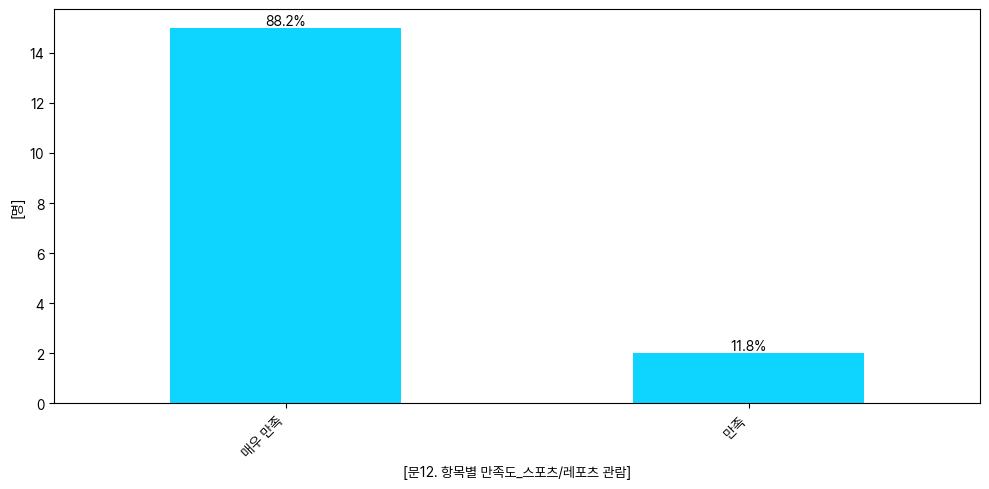

문12. 항목별 만족도_스포츠/레포츠 관람 : 4.88


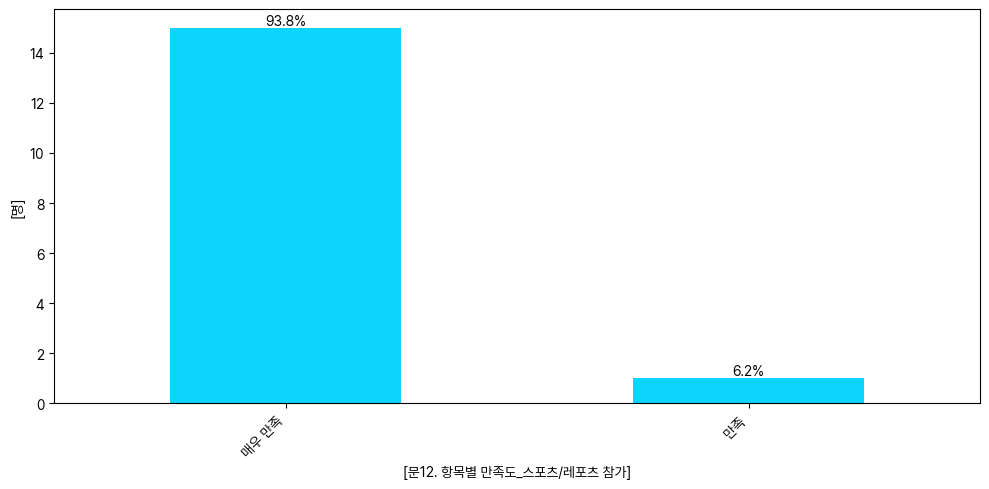

문12. 항목별 만족도_스포츠/레포츠 참가 : 4.94


In [41]:
# 전반적 + 항목별 만족도

# 점수 매핑
score_mapping = {
    "매우 만족": 5,
    "만족": 4,
    "보통": 3,
    "불만족": 2,
    "매우 불만족": 1
}

mean_dict = {}

for col in info_df.loc[:, 'Q11':'Q12a15'].columns:

    eda_plot(col)
    
    # 컬럼 값을 점수로 매핑
    info_df[f'{col}_score'] = info_df[col].map(score_mapping)

    # 평균 점수 계산
    average = info_df[f'{col}_score'].mean()

    # 항목명 가져오기
    value_name = columns_value_df.loc[columns_value_df['변수명'] == col, '항목명'].iloc[0]

    mean_dict[col] = round(average, 2)
    print(f'{value_name} : {mean_dict[col]}')

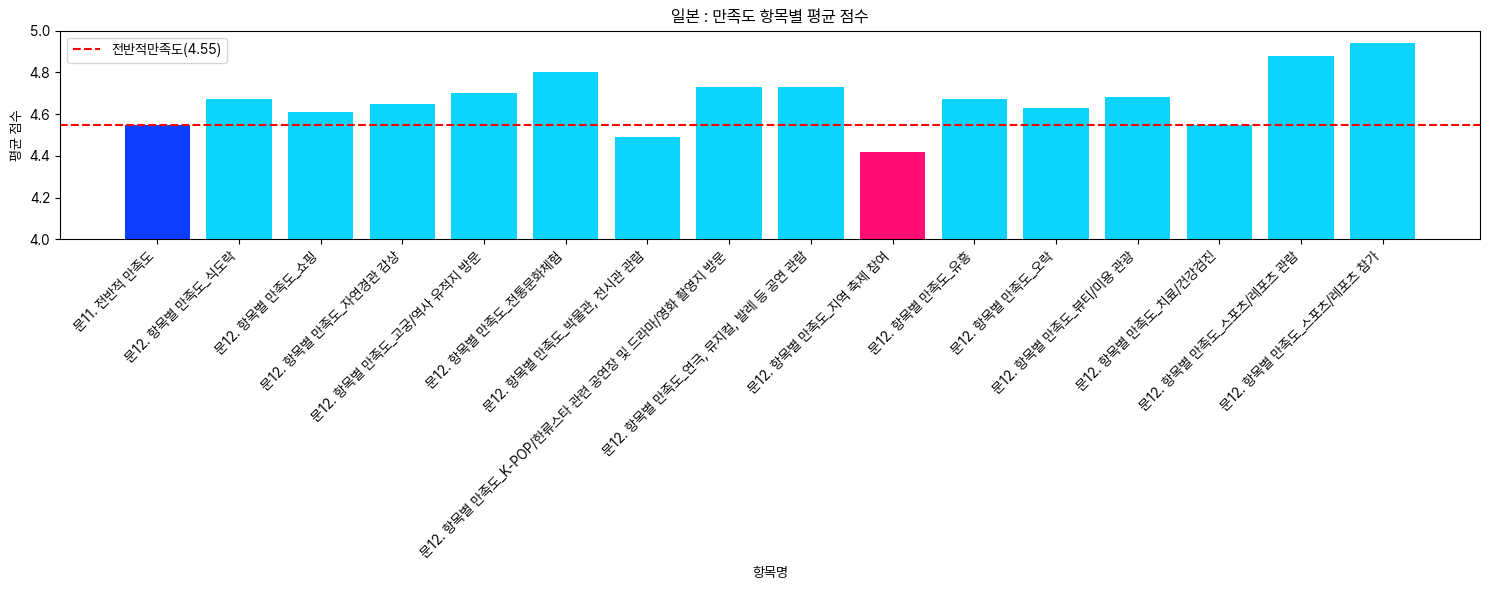

In [42]:
# 변수명에 매핑된 항목명 추출 및 정렬
filtered_df = columns_value_df[columns_value_df['변수명'].isin(mean_dict.keys())]
filtered_df = filtered_df.sort_values(by='변수명')  # 변수명을 기준으로 정렬

# X축 : 항목명
x_labels = filtered_df['항목명'].tolist()

# Y축 : 평균 점수
y_values = [mean_dict[key] for key in filtered_df['변수명']]

# 막대 색상을 지정
default_color = '#0DD5FF'  # 기본 색상
upper_color = '#0D3EFF'  # 강조 색상
lower_color = '#FF0D72'  # 강조 색상

colors = []

for key in filtered_df['변수명']:
    if key == 'Q11':
        colors.append(upper_color)
    elif key == 'Q12a09':
        colors.append(lower_color)
    else:
        colors.append(default_color)

# 그래프 그리기
plt.figure(figsize=(15, 6))
plt.bar(x_labels, y_values, color=colors)
plt.axhline(y=mean_dict['Q11'], color='red', linestyle='--', linewidth=1.5, label=f'전반적만족도({mean_dict['Q11']})')
plt.xlabel('항목명')
plt.ylabel('평균 점수')
plt.title('일본 : 만족도 항목별 평균 점수')
plt.xticks(rotation=45, ha='right')
plt.ylim(4,5)  # y축 최소값 4, 최대값 5
plt.legend()
plt.tight_layout()
plt.savefig(f'bar_chart_goods.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

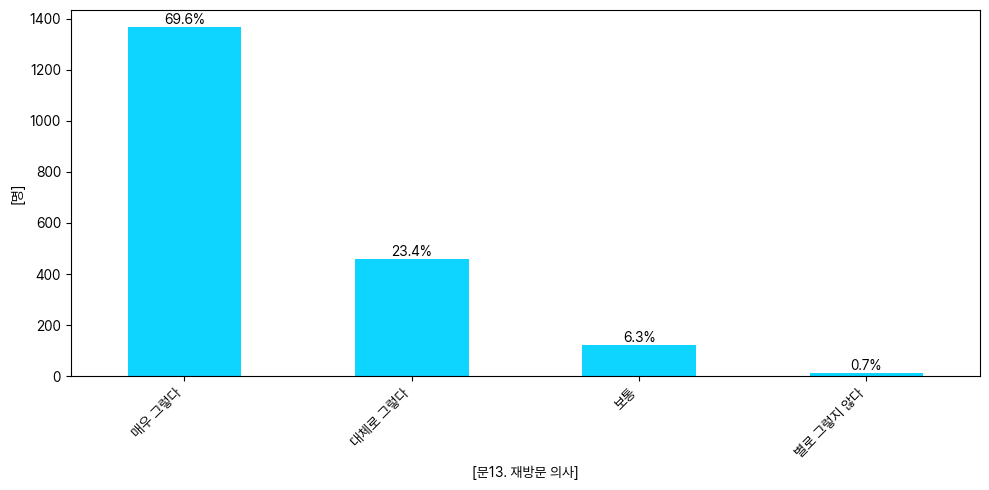

문13. 재방문 의사 : 3.0


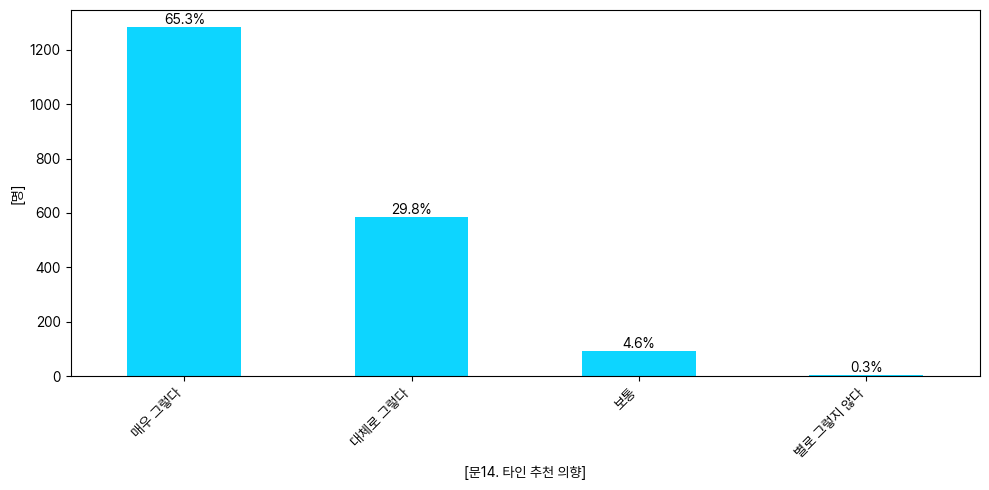

문14. 타인 추천 의향 : 3.0


In [43]:
# 재방문 의사 / 타인추천의향
for col in info_df.loc[:, 'Q13':'Q14'].columns:

    eda_plot(col)
    
    # 컬럼 값을 점수로 매핑
    info_df[f'{col}_score'] = info_df[col].map(score_mapping)

    # 평균 점수 계산
    average = info_df[f'{col}_score'].mean()

    # 항목명 가져오기
    value_name = columns_value_df.loc[columns_value_df['변수명'] == col, '항목명'].iloc[0]
    print(f'{value_name} : {round(average, 2)}')

시각화 해서 봤을 경우 (무응답 제외, 1순위만 체크)

+ 일본 관광객 : 20대/여성이 압도적으로 많음
+ 방한목적 : 관광(여가/휴식)
+ 재방문율이 73.05% 로 상당히 높은 편이며, 첫 방문으로 오는 여행객도 많음
+ 관심계기 : 한류 콘텐츠를 접하고 관심을 가지게 됨
+ 방문을 고려한 아시아 국가 : 대만(국가의 다양한 관광지 관련 정보를 접하고 나서)
+ 고려한 관광활동 1순위 : 1위 쇼핑 / 2위 식도락 / 3위 촬영지 방문
+ 고려한 관광 인프라 1순위: 경제적인 여행 경비
+ 여행 전 한국 관련 정보 수집 경로 1순위: 인터넷 사이트/앱
+ 주로 이용한 사이트 1순위: 소셜 미디어 (아마 트위터..? 왜냐면 일본 사람들은 트위터를 많이 씀..)
+ 부족했던 정보: 교통정보(이동거리, 동선 등)
    + 일본 사람들은 구글 지도를 많이 쓰는데
    + 한국은 국내법(보안)을 이유로 국내 지도 데이터 반출을 해외에 공개하지 않고 있다. 
    + 따라서 구글 지도는 한국 내에서의 정확도와 위용이 많이 떨어짐
    + 아마 이게 교통정보의 부재로 느껴지는 게 아닐까?
+ 동반자 유무: 68.1%의 사람이 동반자 있음
    + 그 중 과반수인 41.2% 가 20대로 보임 (maybe 커플여행이 아닐까..)
+ 참여한 활동 : 1위 식도락(27.88%) / 2위 쇼핑(27.22%) / 3위 자연경관 감상(9.45%)
+ 만족한 활동 : 1위 식도락 / 2위 쇼핑 / 3위 자연경관 감상
+ 가장 좋았던 곳 1순위 (상위 10개) : 부산 1곳 제외 모두 수도권으로 서울 명동이 압도적으로 높은 편
+ 방문권역 : 서울(72.54%) / 경상도(14.05%) / 경기도(5.19%) / 인천(3.9%)
    + 경상도의 경우 부산으로 추정됨
+ 권역 방문율 : 수도권 한정(80.44%) / 지방 한정(15.74%) / 모두 방문(3.82%)
+ 숙박(체제) : 2박 3일 > 3박 4일 > 4박 5일
    + 대부분 단기 여행
+ 숙박 장소 : 호텔(87.63%)
+ 쇼핑 항목 : 1위 식료품(29.64%) / 2위 화장품(27.46%) / 3위 의류(19.62%)
+ 쇼핑 장소 : 1위 로드샵 / 2위 대형마트 / 3위 대형 쇼핑몰
    + 의외로 면세점들이 꼴찌임...
+ 전반적 만족도: 매우만족(59.4%) / 만족(36.7%) / 보통(3.6%)
+ 항목별 만족도: 대부분의 항목에서 만족도가 높은 편
+ 재방문 의사 / 타인 추천 의향 : 평균 4.62, 4.60 으로 확인됨

## 트렌드 분석

### 제일 많은 성비+연령대 찾아보기

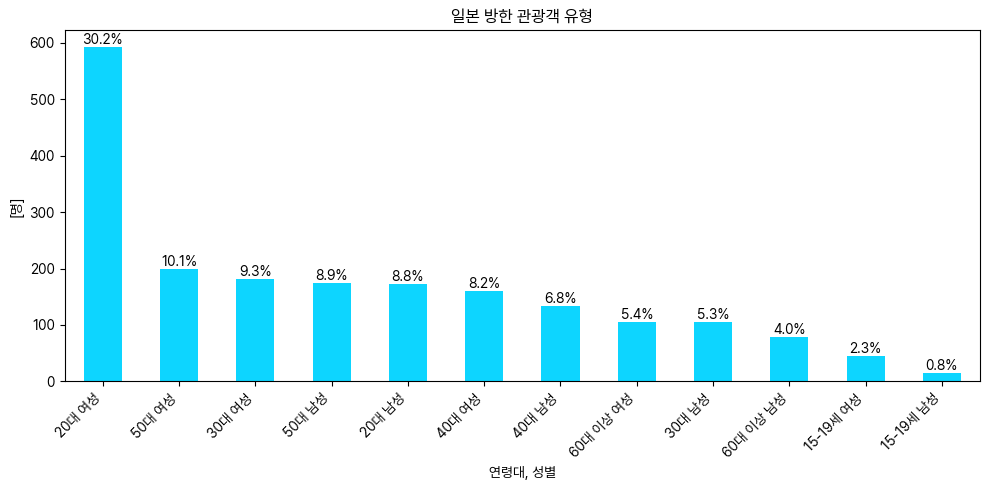

In [44]:
info_df['D_AGE_SEX'] = info_df['D_AGE'] + ' ' + info_df['D_SEX']

eda_plot('D_AGE_SEX', title='일본 방한 관광객 유형', xlabel='연령대, 성별')

- 20대 여성이 제일 많이 옴
- 20대 여성 타켓으로 관심사 + 많이 지출한 항목에 대한 분석(트렌트 분석)
- 맞춤 관광 상품 제안

근거
- 여성이 소비 지출에 대해 남성보다 관대한 편 (관련 논문 존재함)
- 따라서 여성의 방문과 재방문율이 높아지면 관광업 매출에 도움이 될 것으로 생각됨

In [45]:
# 20대 여성
# 만족했던 경험은 무엇인가?
# 가장 만족스러웠던 장소는 어디인가?
# 부족했던 정보나 아쉬웠던 점은 있는가?

# 통합
women_20_travel_df = info_df[(info_df['D_AGE_SEX'] == '20대 여성')]

# 한국 첫 방문 관광객 정보
first_travel_df = info_df[(info_df['D_AGE_SEX'] == '20대 여성') & (info_df['D_NUM'] == '1회')]

# 한국 재 방문 관광객 정보
re_travel_df = info_df[(info_df['D_AGE_SEX'] == '20대 여성') & (info_df['D_NUM'] != '1회')]

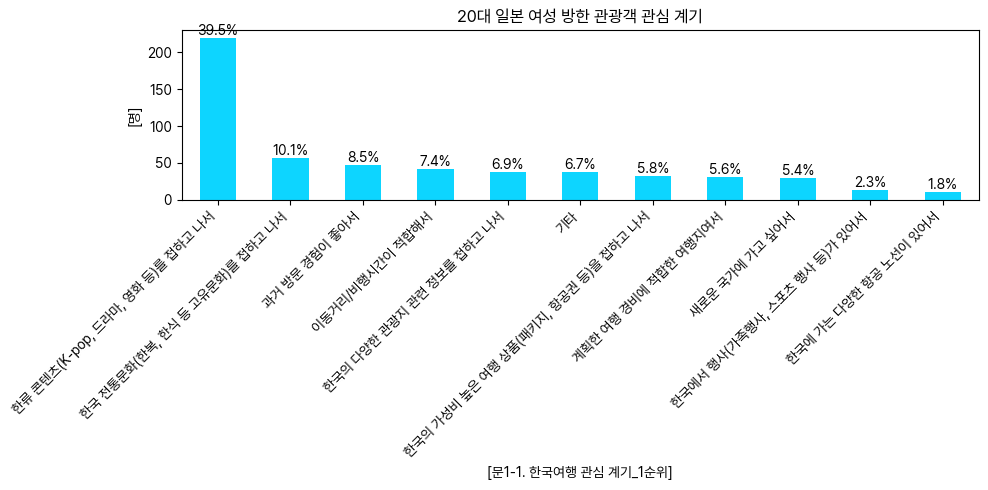

In [46]:
eda_plot('Q1_1a1', title='20대 일본 여성 방한 관광객 관심 계기', info_df = women_20_travel_df)

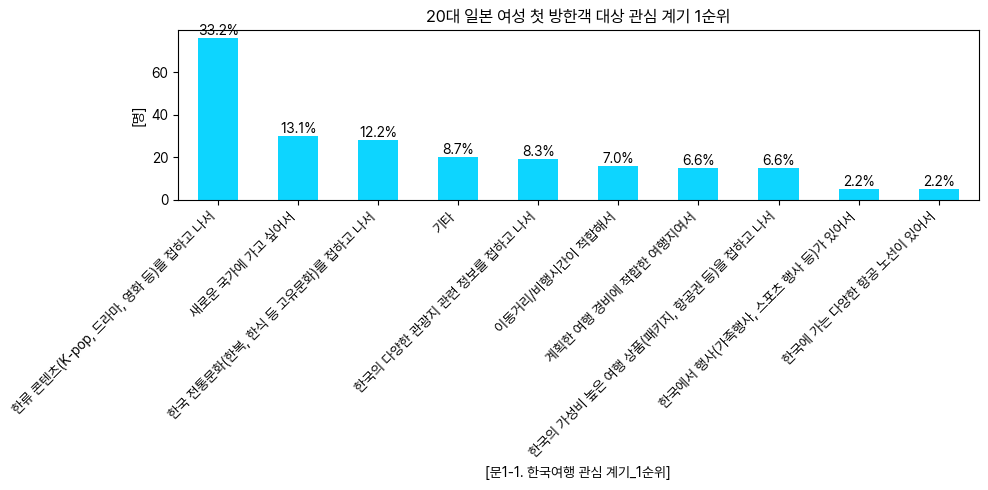

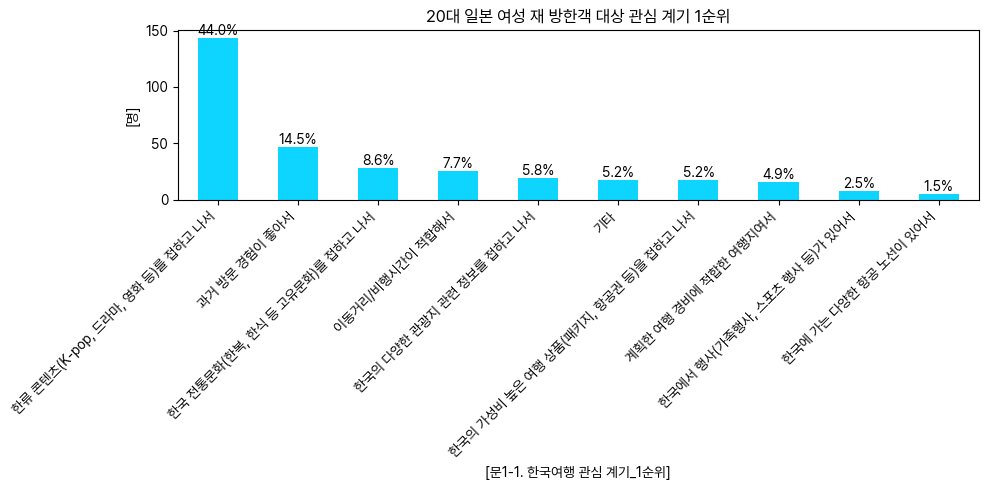

In [47]:
# 첫 방문자들의 방한 관심
eda_plot('Q1_1a1', title='20대 일본 여성 첫 방한객 대상 관심 계기 1순위', info_df = first_travel_df)

# 재 방문자들의 방한 관심
eda_plot('Q1_1a1', title='20대 일본 여성 재 방한객 대상 관심 계기 1순위', info_df = re_travel_df)

- 한류 콘텐츠를 접하고 자연스럽게 한국 문화에 대한 관심(음식, 패션, 화장품 등)이 생긴 것으로 볼 수 있음

1. 첫/재방문 모두 한류 콘텐츠에 많은 관심을 가지고 있음
=> 일본 사람들이 선호하는 한류 콘텐츠에 대한 트렌드 제시 

2. 첫 방문자들이 만족했던 경험과 재방문 관광객의 만족했던 경험을 분석
+ 불만족하거나 부족했던 부분에 대한 분석
+ 위 데이터를 기반으로 하는 트렌드 분석 등을 제시

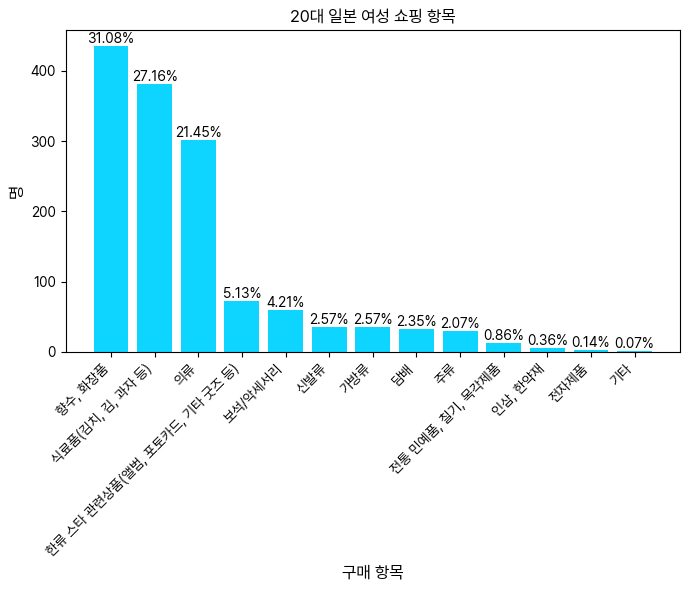

In [48]:
# 20대 여성 방한 관광객 쇼핑 항목

Q10_df = women_20_travel_df.loc[:, 'Q10_2a01':'Q10_2a13']
Q10_df.astype(str)

# 각 컬럼의 데이터 분포를 집계
aggregated_data = {col: women_20_travel_df.loc[women_20_travel_df[col] != -1, col].value_counts() for col in Q10_df.columns}

# 각 Series를 합쳐 하나의 Series로 변환
merged_data = pd.concat(aggregated_data).reset_index()
merged_data.columns = ['컬럼명', '범주', '빈도수']

# 퍼센트(비율) 계산
total = merged_data['빈도수'].sum()  # 전체 빈도수 합계
merged_data['퍼센트'] = (merged_data['빈도수'] / total * 100).round(2)  # 소수점 2자리로 반올림

# 내림차순 정렬
merged_data = merged_data.sort_values(by='빈도수', ascending=False)

# 시각화
plt.figure(figsize=(7, 6))
bars = plt.bar(merged_data['범주'], merged_data['빈도수'], color='#0DD5FF')

# 퍼센트
for bar, percent in zip(bars, merged_data['퍼센트']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{percent}%', ha='center', va='bottom', fontsize=10)

# 그래프 꾸미기
plt.xticks(rotation=45, ha='right')
plt.title("20대 일본 여성 쇼핑 항목", fontsize=12)
plt.ylabel("명", fontsize=12)
plt.xlabel("구매 항목", fontsize=12)
plt.tight_layout()
plt.savefig(f'bar_chart_shoping.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

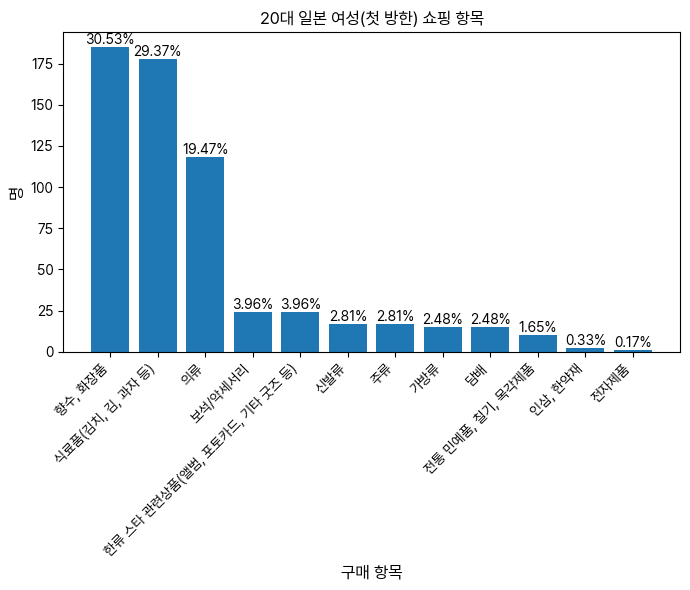

In [49]:
# 20대 여성 첫 방한 관광객 쇼핑 항목

Q10_df = first_travel_df.loc[:, 'Q10_2a01':'Q10_2a13']
Q10_df.astype(str)

# 각 컬럼의 데이터 분포를 집계
aggregated_data = {col: first_travel_df.loc[first_travel_df[col] != -1, col].value_counts() for col in Q10_df.columns}

# 각 Series를 합쳐 하나의 Series로 변환
merged_data = pd.concat(aggregated_data).reset_index()
merged_data.columns = ['컬럼명', '범주', '빈도수']

# 퍼센트(비율) 계산
total = merged_data['빈도수'].sum()  # 전체 빈도수 합계
merged_data['퍼센트'] = (merged_data['빈도수'] / total * 100).round(2)  # 소수점 2자리로 반올림

# 내림차순 정렬
merged_data = merged_data.sort_values(by='빈도수', ascending=False)

# 시각화
plt.figure(figsize=(7, 6))
bars = plt.bar(merged_data['범주'], merged_data['빈도수'])

# 퍼센트
for bar, percent in zip(bars, merged_data['퍼센트']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{percent}%', ha='center', va='bottom', fontsize=10)

# 그래프 꾸미기
plt.xticks(rotation=45, ha='right')
plt.title("20대 일본 여성(첫 방한) 쇼핑 항목", fontsize=12)
plt.ylabel("명", fontsize=12)
plt.xlabel("구매 항목", fontsize=12)
plt.tight_layout()
plt.show()

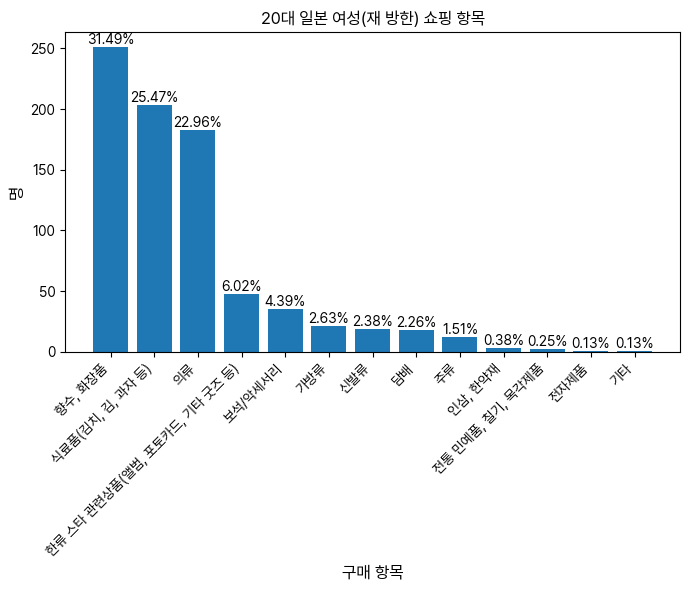

In [50]:
# 20대 여성 재 방한 관광객 쇼핑 항목

Q10_df = re_travel_df.loc[:, 'Q10_2a01':'Q10_2a13']
Q10_df.astype(str)

# 각 컬럼의 데이터 분포를 집계
aggregated_data = {col: re_travel_df.loc[re_travel_df[col] != -1, col].value_counts() for col in Q10_df.columns}

# 각 Series를 합쳐 하나의 Series로 변환
merged_data = pd.concat(aggregated_data).reset_index()
merged_data.columns = ['컬럼명', '범주', '빈도수']

# 퍼센트(비율) 계산
total = merged_data['빈도수'].sum()  # 전체 빈도수 합계
merged_data['퍼센트'] = (merged_data['빈도수'] / total * 100).round(2)  # 소수점 2자리로 반올림

# 내림차순 정렬
merged_data = merged_data.sort_values(by='빈도수', ascending=False)

# 시각화
plt.figure(figsize=(7, 6))
bars = plt.bar(merged_data['범주'], merged_data['빈도수'])

# 퍼센트
for bar, percent in zip(bars, merged_data['퍼센트']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{percent}%', ha='center', va='bottom', fontsize=10)

# 그래프 꾸미기
plt.xticks(rotation=45, ha='right')
plt.title("20대 일본 여성(재 방한) 쇼핑 항목", fontsize=12)
plt.ylabel("명", fontsize=12)
plt.xlabel("구매 항목", fontsize=12)
plt.tight_layout()
plt.show()

20대 여성의 경우 식료품 보다 화장품을 더 많이 산다는 것을 알 수 있음

특이한 점은 재방한 20대 여성의 경우 식료품을 덜 사고 화장품을 첫 방한객들에 비해 더 많이 사용한다는 것

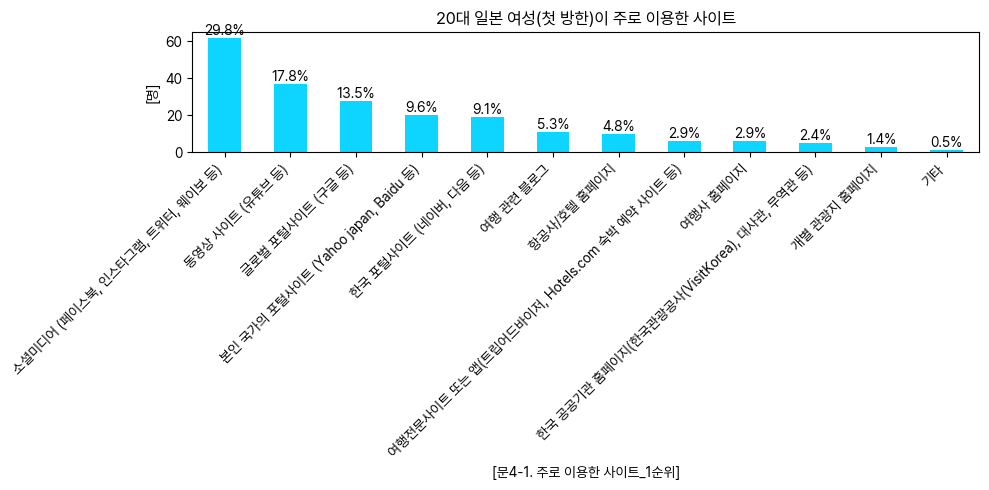

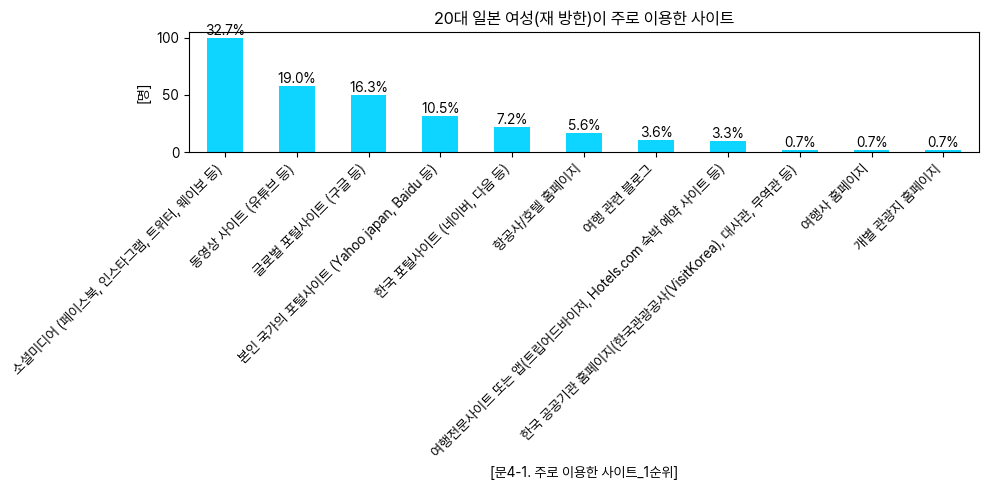

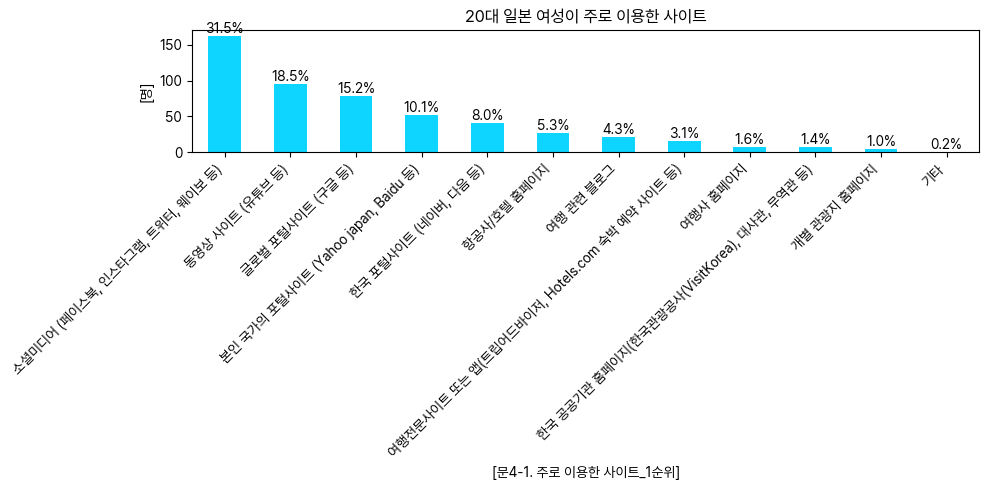

In [51]:
# 주로 이용한 사이트 1순위
eda_plot('Q4_1a1', info_df=first_travel_df, title='20대 일본 여성(첫 방한)이 주로 이용한 사이트')
eda_plot('Q4_1a1', info_df=re_travel_df, title='20대 일본 여성(재 방한)이 주로 이용한 사이트')
eda_plot('Q4_1a1', info_df=women_20_travel_df, title='20대 일본 여성이 주로 이용한 사이트')

일본에서 제일 많이 사용하는 SNS (일본 20대 여성 기준) - 트위터

참고 자료 - https://e-datanews.tistory.com/557

트위터를 통해 일본의 20대 여성이 한국 화장품+한국 문화에 대해 얻는 정보를 많이 알 수 있지 않을까?

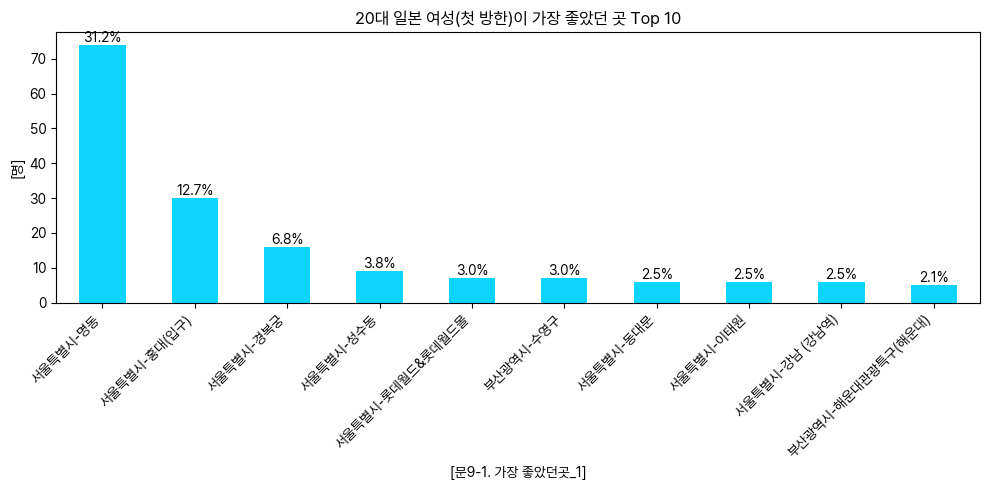

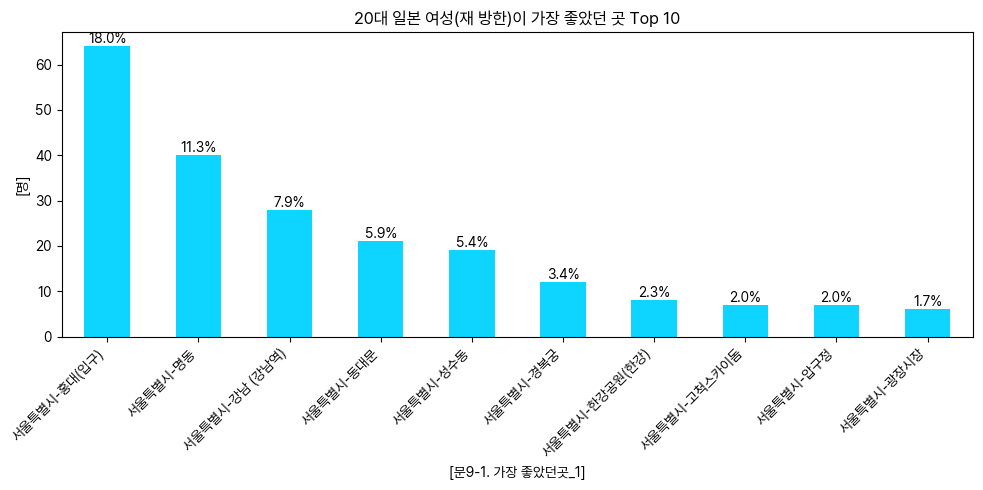

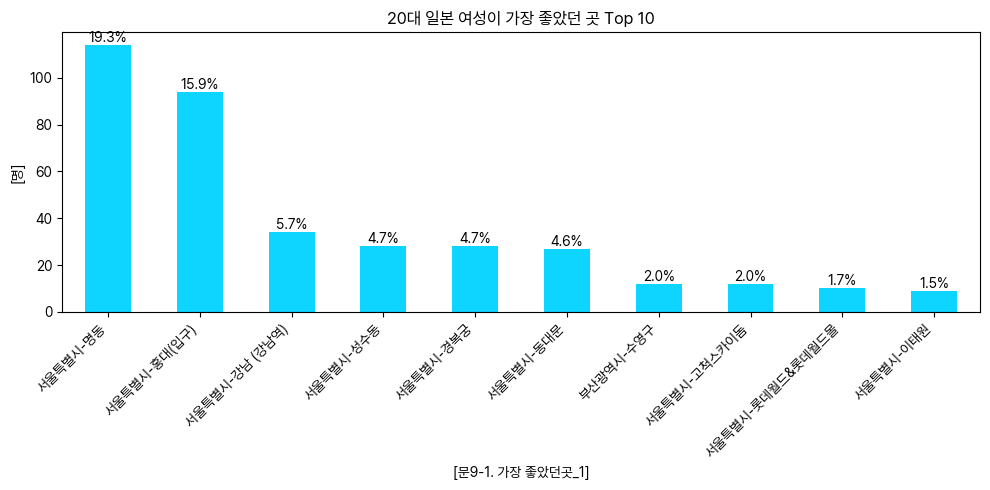

In [52]:
eda_plot('Q9_1_1',  info_df=first_travel_df, title='20대 일본 여성(첫 방한)이 가장 좋았던 곳 Top 10', head=10)
eda_plot('Q9_1_1',  info_df=re_travel_df, title='20대 일본 여성(재 방한)이 가장 좋았던 곳 Top 10', head=10) 
eda_plot('Q9_1_1',  info_df=women_20_travel_df, title='20대 일본 여성이 가장 좋았던 곳 Top 10', head=10) 

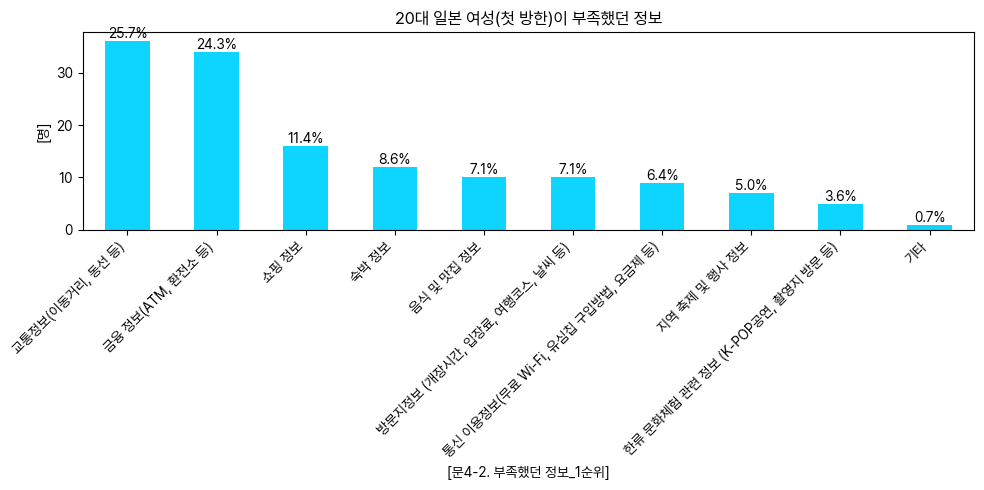

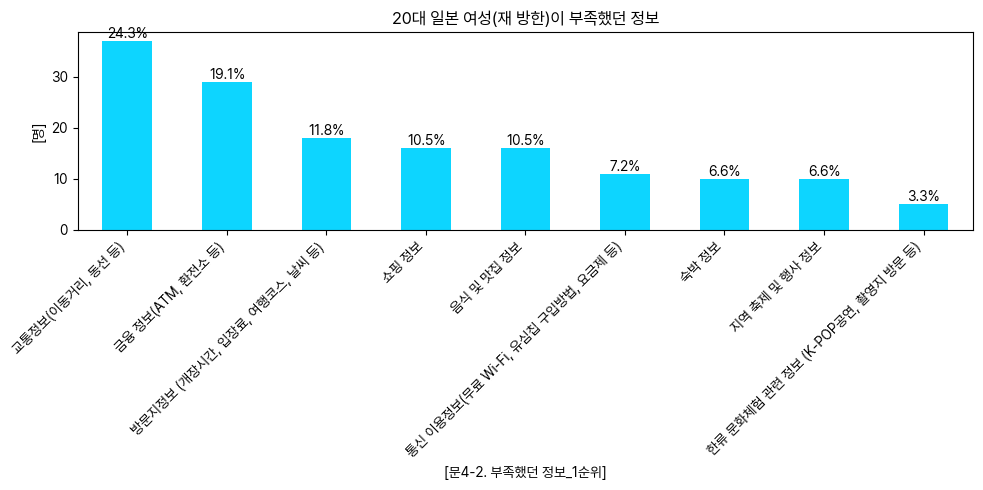

In [53]:
eda_plot('Q4_2a1',  info_df=first_travel_df, title='20대 일본 여성(첫 방한)이 부족했던 정보')
eda_plot('Q4_2a1',  info_df=re_travel_df, title='20대 일본 여성(재 방한)이 부족했던 정보')

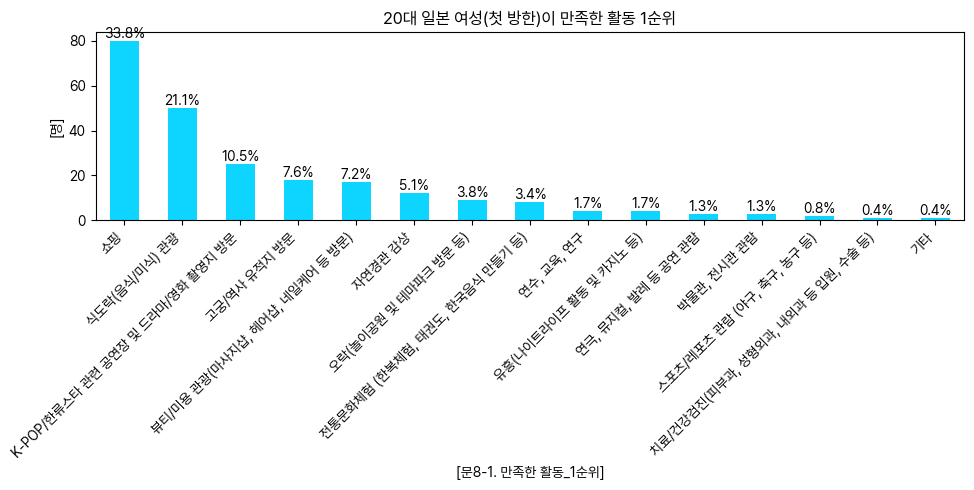

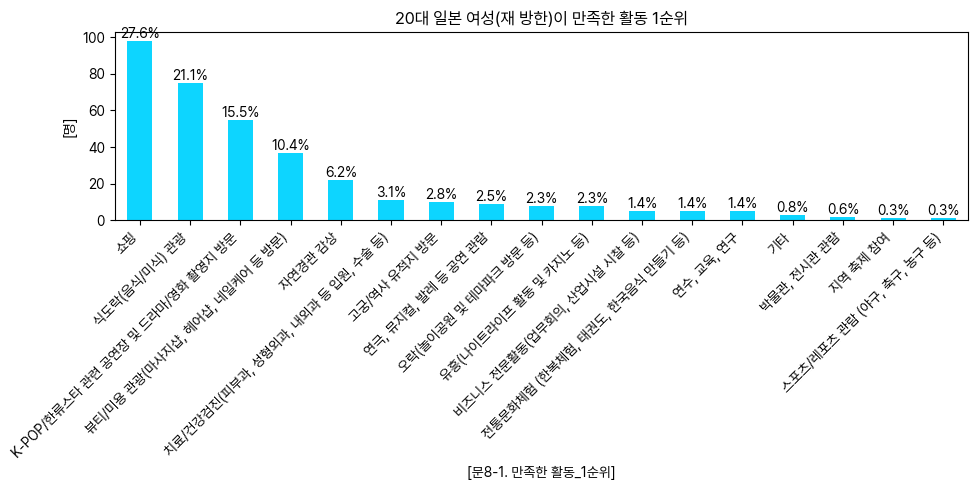

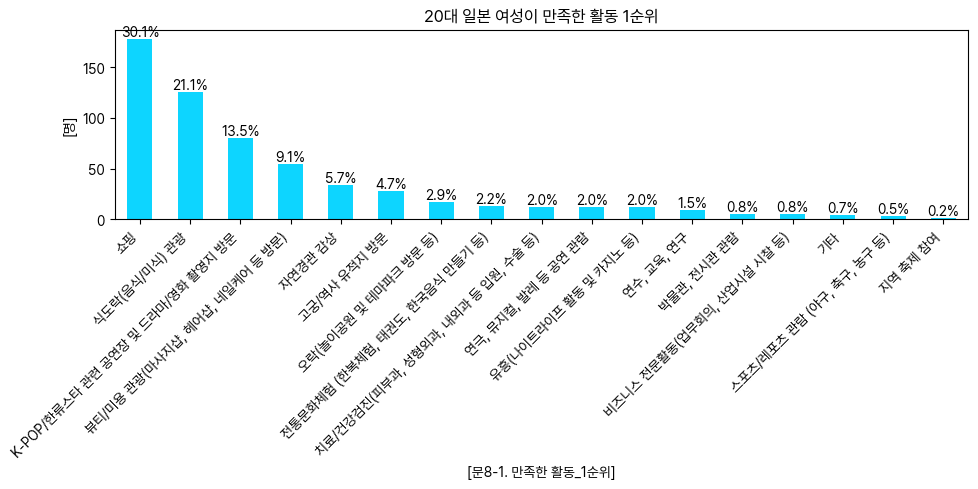

In [54]:
# 만족한 활동 1순위
eda_plot('Q8_1a1', info_df=first_travel_df, title='20대 일본 여성(첫 방한)이 만족한 활동 1순위')
eda_plot('Q8_1a1', info_df=re_travel_df, title='20대 일본 여성(재 방한)이 만족한 활동 1순위')
eda_plot('Q8_1a1', info_df=women_20_travel_df, title='20대 일본 여성이 만족한 활동 1순위')

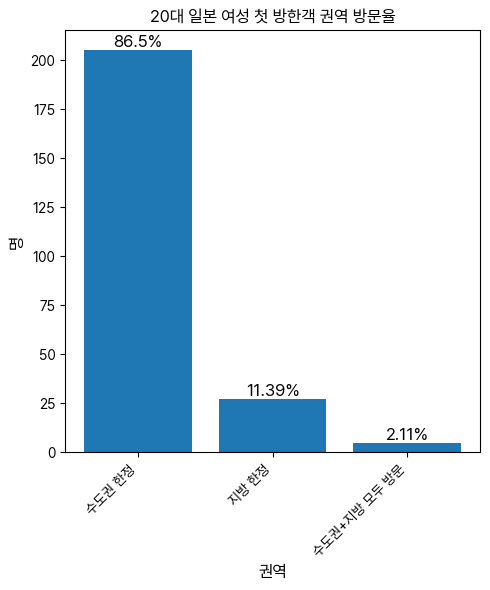

In [55]:
# 20대 여성 첫 방한객 방문권역

kwon_per_df = first_travel_df.loc[:, 'KWONA1':'KWONA3']
kwon_per_df.astype(str)

# 각 컬럼의 데이터 분포를 집계
aggregated_data = {col: first_travel_df.loc[first_travel_df[col] != -1, col].value_counts() for col in kwon_per_df.columns}

# 각 Series를 합쳐 하나의 Series로 변환
merged_data = pd.concat(aggregated_data).reset_index()
merged_data.columns = ['컬럼명', '범주', '빈도수']

# 퍼센트(비율) 계산
total = merged_data['빈도수'].sum()  # 전체 빈도수 합계
merged_data['퍼센트'] = (merged_data['빈도수'] / total * 100).round(2)  # 소수점 2자리로 반올림

# 내림차순 정렬
merged_data = merged_data.sort_values(by='빈도수', ascending=False)

# 시각화
plt.figure(figsize=(5, 6))
bars = plt.bar(merged_data['범주'], merged_data['빈도수'])

# 퍼센트
for bar, percent in zip(bars, merged_data['퍼센트']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{percent}%', ha='center', va='bottom', fontsize=12)

# 그래프 꾸미기
plt.xticks(rotation=45, ha='right')
plt.title("20대 일본 여성 첫 방한객 권역 방문율", fontsize=12)
plt.ylabel("명", fontsize=12)
plt.xlabel("권역", fontsize=12)
plt.tight_layout()
plt.show()

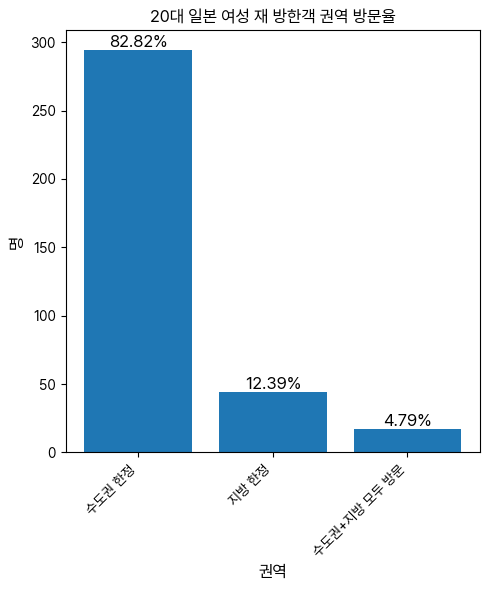

In [56]:
# 20대 여성 첫 방한객 방문권역

kwon_per_df = re_travel_df.loc[:, 'KWONA1':'KWONA3']
kwon_per_df.astype(str)

# 각 컬럼의 데이터 분포를 집계
aggregated_data = {col: re_travel_df.loc[re_travel_df[col] != -1, col].value_counts() for col in kwon_per_df.columns}

# 각 Series를 합쳐 하나의 Series로 변환
merged_data = pd.concat(aggregated_data).reset_index()
merged_data.columns = ['컬럼명', '범주', '빈도수']

# 퍼센트(비율) 계산
total = merged_data['빈도수'].sum()  # 전체 빈도수 합계
merged_data['퍼센트'] = (merged_data['빈도수'] / total * 100).round(2)  # 소수점 2자리로 반올림

# 내림차순 정렬
merged_data = merged_data.sort_values(by='빈도수', ascending=False)

# 시각화
plt.figure(figsize=(5, 6))
bars = plt.bar(merged_data['범주'], merged_data['빈도수'])

# 퍼센트
for bar, percent in zip(bars, merged_data['퍼센트']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{percent}%', ha='center', va='bottom', fontsize=12)

# 그래프 꾸미기
plt.xticks(rotation=45, ha='right')
plt.title("20대 일본 여성 재 방한객 권역 방문율", fontsize=12)
plt.ylabel("명", fontsize=12)
plt.xlabel("권역", fontsize=12)
plt.tight_layout()
plt.show()

- 한류 문화를 드라마, k-pop, 영화 등에서 많이 접함
- 소셜 미디어를 많이 사용하고
- 수도권 위주 여행을 함
- 향수/화장품에 대한 지출이 제일 많다
    - 따라서 쇼핑할 게 많은 명동/홍대에 제일 많이 가는 것으로 보임
- 교통 정보와 금융 정보에 대해 불편함을 느끼고 있음  

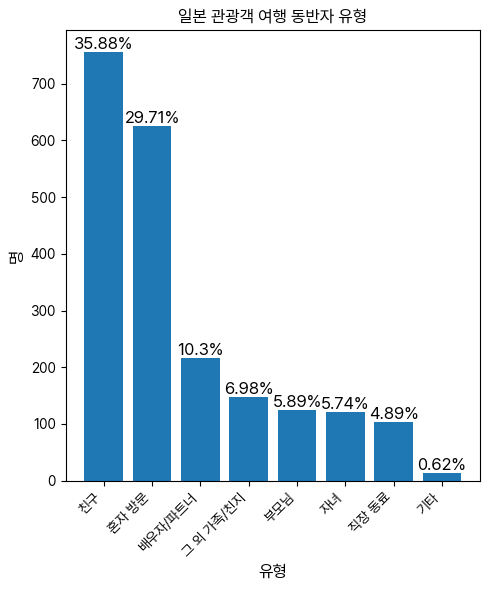

In [57]:
# 동반자 유형 조사

q7_df = info_df.loc[:, 'Q7a_dk':'Q7a8']
q7_df.astype(str)

# 각 컬럼의 데이터 분포를 집계
aggregated_data = {col: q7_df.loc[q7_df[col] != -1, col].value_counts() for col in q7_df.columns}

# 각 Series를 합쳐 하나의 Series로 변환
merged_data = pd.concat(aggregated_data).reset_index()
merged_data.columns = ['컬럼명', '범주', '빈도수']

# 퍼센트(비율) 계산
total = merged_data['빈도수'].sum()  # 전체 빈도수 합계
merged_data['퍼센트'] = (merged_data['빈도수'] / total * 100).round(2)  # 소수점 2자리로 반올림

# 내림차순 정렬
merged_data = merged_data.sort_values(by='빈도수', ascending=False)

# 시각화
plt.figure(figsize=(5, 6))
bars = plt.bar(merged_data['범주'], merged_data['빈도수'])

# 퍼센트
for bar, percent in zip(bars, merged_data['퍼센트']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{percent}%', ha='center', va='bottom', fontsize=12)

# 그래프 꾸미기
plt.xticks(rotation=45, ha='right')
plt.title("일본 관광객 여행 동반자 유형", fontsize=12)
plt.ylabel("명", fontsize=12)
plt.xlabel("유형", fontsize=12)
plt.tight_layout()
plt.show()

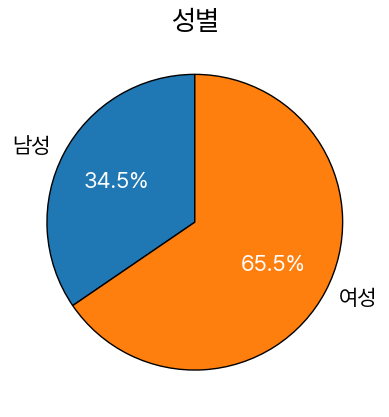

In [58]:
import matplotlib.pyplot as plt

# 성별
# 값 필터링 및 카운트
value_counts = info_df.loc[info_df['D_SEX'] != -1, 'D_SEX'].value_counts(normalize=True) * 100  # 퍼센트 계산
counts = info_df.loc[info_df['D_SEX'] != -1, 'D_SEX'].value_counts()  # 절대값 카운트

# 항목명 추출
xlabel_name = columns_value_df.loc[columns_value_df['변수명'] == 'D_SEX', '항목명'].head(1).values[0]

# 순서를 조정 (여성이 먼저 오도록)
value_counts = value_counts.sort_index(ascending=True)

# 커스텀 함수로 % 표시 텍스트의 색상 설정
def make_autopct(values):
    def custom_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%'  # 비율만 표시
    return custom_autopct

# 파이 그래프 그리기
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(value_counts, 
                                  labels=value_counts.index, 
                                  autopct=make_autopct(value_counts), 
                                  startangle=90,  # 12시 방향 기준
                                  textprops={'fontsize': 16},
                                  wedgeprops={'edgecolor': 'k'})  # 경계선 추가(optional)

# % 텍스트 색상 화이트로 설정
for autotext in autotexts:
    autotext.set_color('white')

# 그래프 제목 추가
ax.set_title(xlabel_name, fontsize=20)

plt.savefig('pie_chart_sex.png', format='png', dpi=300)

# 그래프 보여주기
plt.show()

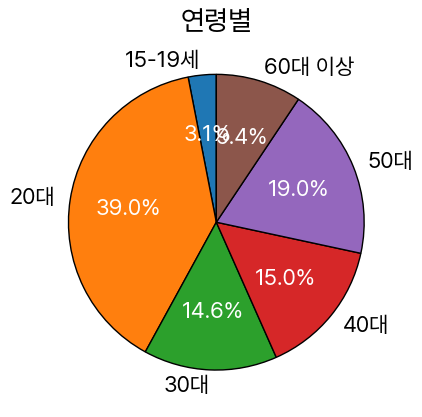

In [59]:
import matplotlib.pyplot as plt

# 성별
# 값 필터링 및 카운트
value_counts = info_df.loc[info_df['D_AGE'] != -1, 'D_AGE'].value_counts(normalize=True) * 100  # 퍼센트 계산
counts = info_df.loc[info_df['D_AGE'] != -1, 'D_AGE'].value_counts()  # 절대값 카운트

# 항목명 추출
xlabel_name = columns_value_df.loc[columns_value_df['변수명'] == 'D_AGE', '항목명'].head(1).values[0]

# 순서를 조정 (여성이 먼저 오도록)
value_counts = value_counts.sort_index(ascending=True)

# 커스텀 함수로 % 표시 텍스트의 색상 설정
def make_autopct(values):
    def custom_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%'  # 비율만 표시
    return custom_autopct

# 파이 그래프 그리기
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(value_counts, 
                                  labels=value_counts.index, 
                                  autopct=make_autopct(value_counts), 
                                  startangle=90,  # 12시 방향 기준
                                  textprops={'fontsize': 16},
                                  wedgeprops={'edgecolor': 'k'})  # 경계선 추가(optional)

# % 텍스트 색상 화이트로 설정
for autotext in autotexts:
    autotext.set_color('white')

# 그래프 제목 추가
ax.set_title(xlabel_name, fontsize=20)

plt.savefig('pie_chart_age.png', format='png', dpi=300)

# 그래프 보여주기
plt.show()

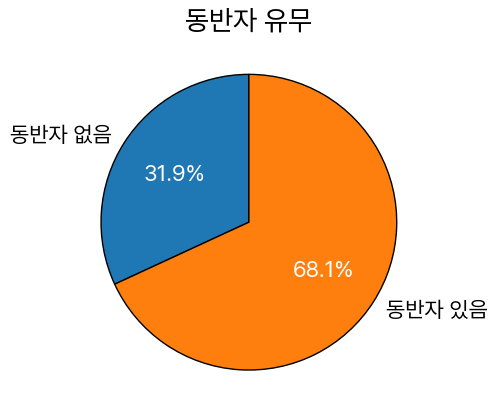

In [60]:
import matplotlib.pyplot as plt

# 동반자 유무
# 값 필터링 및 카운트
value_counts = info_df.loc[info_df['Q7A'] != -1, 'Q7A'].value_counts(normalize=True) * 100  # 퍼센트 계산
counts = info_df.loc[info_df['Q7A'] != -1, 'Q7A'].value_counts()  # 절대값 카운트

# 항목명 추출
xlabel_name = '동반자 유무'

# 순서를 조정
value_counts = value_counts.sort_index(ascending=True)

# 커스텀 함수로 % 표시 텍스트의 색상 설정
def make_autopct(values):
    def custom_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%'  # 비율만 표시
    return custom_autopct

# 파이 그래프 그리기
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(value_counts, 
                                  labels=value_counts.index, 
                                  autopct=make_autopct(value_counts), 
                                  startangle=90,  # 12시 방향 기준
                                  textprops={'fontsize': 16},
                                  wedgeprops={'edgecolor': 'k'})  # 경계선 추가(optional)

# % 텍스트 색상 화이트로 설정
for autotext in autotexts:
    autotext.set_color('white')

# 그래프 제목 추가
ax.set_title(xlabel_name, fontsize=20)

plt.savefig('pie_chart_Q7A.png', format='png', dpi=300)

# 그래프 보여주기
plt.show()

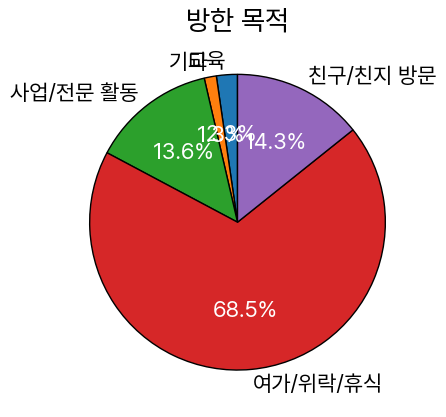

In [61]:
import matplotlib.pyplot as plt

# 동반자 유무
# 값 필터링 및 카운트
value_counts = info_df.loc[info_df['D_MOK'] != -1, 'D_MOK'].value_counts(normalize=True) * 100  # 퍼센트 계산
counts = info_df.loc[info_df['D_MOK'] != -1, 'D_MOK'].value_counts()  # 절대값 카운트

# 항목명 추출
xlabel_name = '방한 목적'

# 순서를 조정
value_counts = value_counts.sort_index(ascending=True)

# 커스텀 함수로 % 표시 텍스트의 색상 설정
def make_autopct(values):
    def custom_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%'  # 비율만 표시
    return custom_autopct

# 파이 그래프 그리기
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(value_counts, 
                                  labels=value_counts.index, 
                                  autopct=make_autopct(value_counts), 
                                  startangle=90,  # 12시 방향 기준
                                  textprops={'fontsize': 16},
                                  wedgeprops={'edgecolor': 'k'})  # 경계선 추가(optional)

# % 텍스트 색상 화이트로 설정
for autotext in autotexts:
    autotext.set_color('white')

# 그래프 제목 추가
ax.set_title(xlabel_name, fontsize=20)

plt.savefig('pie_chart_D_MOK.png', format='png', dpi=300)

# 그래프 보여주기
plt.show()

In [62]:
pd.reset_option('display.max_columns')      # 설정 초기화